# Проект: Обучение с учителем: качество модели

Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Как решать задачу:
* Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
* Нужно собрать данные по клиентам по следующим группам:
* Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
* Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
* Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
* Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

* Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
* В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
* Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Описание данных

Данные для работы находятся в нескольких таблицах.
* market_file.csv
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


* market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


* market_time.csv
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.


* money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
Прибыль — значение прибыли.

Решение задачи будет в два этапа:
Разработаем модель, которая предскажет вероятность снижения покупательской активности.
Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность. Используем данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). 

## Загрузка данных

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import sys


!pip install phik -q
!pip install shap -q
!pip install --upgrade scikit-learn -q
!pip install --upgrade pandas==1.5.0 -q

In [2]:
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import set_matplotlib_formats
from IPython.display import display, HTML

import numpy as np
import os
import pandas  as pd
import phik
import seaborn as sns
import shap

from phik import phik_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
                        
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
                                  
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal=',')
market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal=',')
market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal=',')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [4]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [7]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Выводы:
    
- Данные успешно загружены и просмотрены с помощью head().
- market_file.csv - таблица с данные о поведении покупателя на сайте содержит 13 столбцов.
- market_money.csv - с данными о выручке содержит 3 столбца.
- market_time.csv - с данными о времени (в минутах), которое покупатель провёл на сайте в течение периодасодержит 3 столбца.
- money.csv - с данными о среднемесячной прибыли покупателя за последние 3 месяца содержит 2 столбца.
- Все таблицы имеют общий столбец `"id"

## Предобработка данных

In [8]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Обнаружены ошибки в данных:
- значение "стандартт" с опечаткой. 
Нужно исправить такие данные.
Также принято решение преобразовать названия всех столбцов в нижний регистр и заменить пробелы символом "_", чтобы стандартизировать их формат и упростить работу с данными.

In [9]:
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(' ', '_')

In [10]:
market_file["тип_сервиса"] = market_file["тип_сервиса"].replace(['стандартт'],'стандарт')

In [11]:
display(market_file["покупательская_активность"].unique())  
display(market_file["разрешить_сообщать"].unique()) 
display(market_file["популярная_категория"].unique()) 
market_file["тип_сервиса"].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['премиум', 'стандарт'], dtype=object)

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Все уникальные значения в столбце "покупательская_активность" соответствуют заданию: "Снизилась" и "Прежний уровень".    
В столбце "разрешить_сообщать" значения представлены корректно: "да" и "нет".
Столбец "популярная_категория" содержит разнообразные категории товаров, данные соответствуют ожиданиям.    
Опечатка в столбце "тип_сервиса" (пробел) исправлена: теперь значения "премиум" и "стандарт" представлены корректно.

In [12]:
display(market_file.head())
market_file.info()
display(market_file.head())
market_file.info()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   покупательская_активность            1300 non-null   object
 2   тип_сервиса                          1300 non-null   object
 3   разрешить_сообщать                   1300 non-null   object
 4   маркет_актив_6_мес                   1300 non-null   object
 5   маркет_актив_тек_мес                 1300 non-null   int64 
 6   длительность                         1300 non-null   int64 
 7   акционные_покупки                    1300 non-null   object
 8   популярная_категория                 1300 non-null   object
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  ошибка_сервиса                       1300 n

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   покупательская_активность            1300 non-null   object
 2   тип_сервиса                          1300 non-null   object
 3   разрешить_сообщать                   1300 non-null   object
 4   маркет_актив_6_мес                   1300 non-null   object
 5   маркет_актив_тек_мес                 1300 non-null   int64 
 6   длительность                         1300 non-null   int64 
 7   акционные_покупки                    1300 non-null   object
 8   популярная_категория                 1300 non-null   object
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  ошибка_сервиса                       1300 n

In [13]:
market_file["маркет_актив_6_мес"] = market_file["маркет_актив_6_мес"].astype(float)
market_file["акционные_покупки"] = market_file["акционные_покупки"].astype(float)

market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [14]:
print('Явных дубликатов:', market_file.duplicated().sum(), '\n')
market_file.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_с

In [15]:
display(market_money.head())
display(market_money.info())
market_money["Период"].unique()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


None

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [16]:
market_money = market_money.drop_duplicates().reset_index(drop=True)
print('Явных дубликатов:', market_money.duplicated().sum(), '\n')

Явных дубликатов: 0 



In [17]:
market_money.columns = map(str.lower, market_money.columns)
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   период   3900 non-null   object
 2   выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


In [18]:
market_money["выручка"] = market_money["выручка"].astype(float)

In [19]:
market_time.columns = map(str.lower, market_time.columns)

In [20]:
market_time["период"] = market_time["период"].replace(['предыдцщий_месяц'],'предыдущий_месяц')
print('Явных дубликатов:', market_time.duplicated().sum(), '\n')

Явных дубликатов: 0 



In [21]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [22]:
money.columns = map(str.lower, money.columns)
print('Явных дубликатов:', money.duplicated().sum(), '\n')

Явных дубликатов: 0 



In [23]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Выводы по Шагу 2 
    
Предобработка данных:

1. Исправлены названия столбцов во всех таблицах:
   - Названия приведены к единому стилю — в нижний регистр, с заменой пробелов на символ `_`.
   - Это упрощает дальнейшую работу с данными.

2. Исправлены опечатки в данных:
   - В столбце тип_сервиса исправлена опечатка "стандартт" на "стандарт".
   - В столбце период заменены некорректные значения, например, "предпредыдущий_месяц".

3. Проверка и приведение типов данных:
   - Столбцы маркет_актив_6_мес и акционные_покупки преобразованы в числовой формат (float64).
   - У остальных столбцов типы данных соответствуют их содержимому.

4. Проверены уникальные значения в ключевых столбцах:
   - Все категории и текстовые значения соответствуют ожидаемым.

5. Удалены дубликаты:
   - Явные дубликаты отсутствуют во всех таблицах. Данные проверены и очищены.

6. Проверена структура данных:
   - Убедились, что в каждой таблице отсутствуют пропуски (non-null count соответствует количеству строк).
   - Информация о типах данных подтверждена.

Результат:
Данные из всех таблиц полностью подготовлены для анализа и построения моделей. Все опечатки устранены, дубликаты удалены, а столбцы приведены к единому формату.

## Исследовательский анализ данных

In [24]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


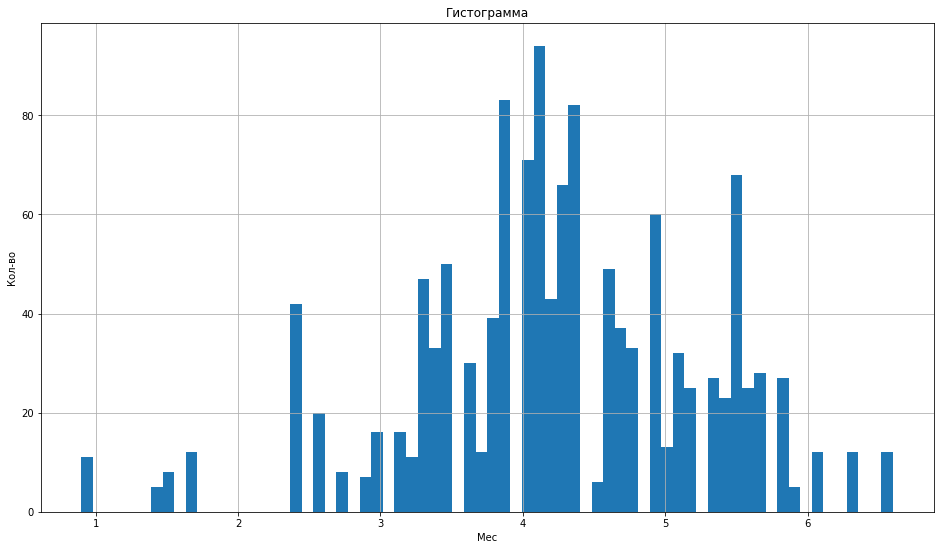

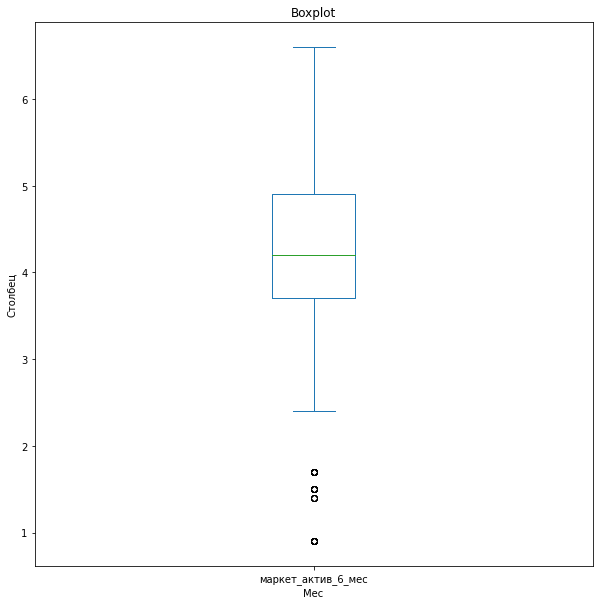

In [25]:
(
    market_file['маркет_актив_6_мес']
    .plot(kind='hist', bins=70, grid=True, figsize=(16, 9))
)
plt.title('Гистограмма')
plt.xlabel('Мес')
plt.ylabel('Кол-во')
plt.show()

(
    market_file['маркет_актив_6_мес']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Boxplot')
plt.xlabel('Мес')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Гистограмма показывает, что значения маркетинговой активности за 6 месяцев распределены с пиком около 4. 

Большинство значений находится в диапазоне от 3 до 5, что соответствует средней активности.
    
Boxplot подтверждает наличие выбросов ниже 2, которые могут указывать на аномалии или клиентов с минимальной активностью.
    
Распределение данных близко к нормальному, однако выбросы требуют дополнительного анализа

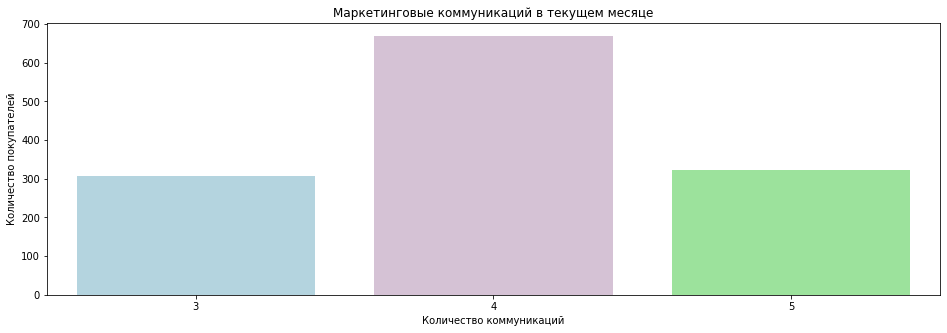

In [26]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(
    x='маркет_актив_тек_мес',
    data=market_file,
    palette=['#ADD8E6', '#D8BFD8', '#90EE90'] 
)
plt.title('Маркетинговые коммуникаций в текущем месяце')
plt.xlabel('Количество коммуникаций')
plt.ylabel('Количество покупателей')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

На графике видно, что большинство клиентов имели 4 маркетинговые коммуникации в текущем месяце.
Значительно меньше клиентов получили 3 или 5 коммуникаций.
Распределение демонстрирует пик активности на уровне 4 коммуникаций, что может быть основной стратегией взаимодействия с клиентами.

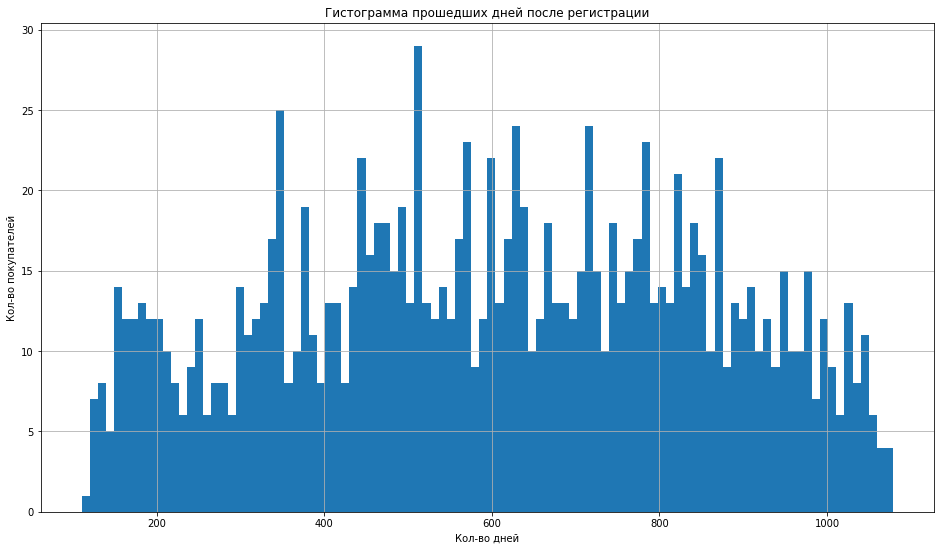

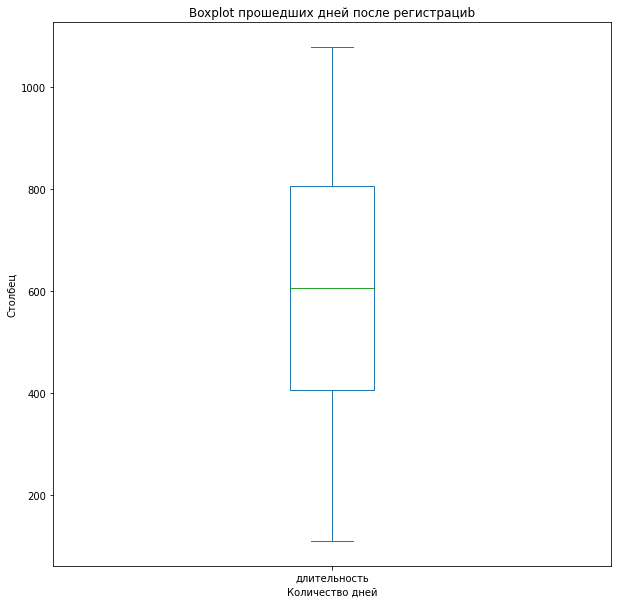

In [27]:
(
    market_file['длительность']
    .plot(kind='hist', bins=100, grid=True, figsize=(16, 9))
)
plt.title('Гистограмма прошедших дней после регистрации')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во покупателей')
plt.show()

(
    market_file['длительность']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Boxplot прошедших дней после регистрациb')
plt.xlabel('Количество дней')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Гистограмма и boxplot длительности (количества прошедших дней после регистрации):
    
Первая часть кода строит гистограмму, отображающую распределение значений длительности (длительность).
bins=100 указывает количество интервалов (столбцов).
grid=True добавляет сетку для удобства визуального анализа.
    
Размер графика задаётся через figsize=(16, 9).
Заголовок, оси X и Y подписаны для пояснения графика.
    
Вторая часть кода строит boxplot для наглядной оценки распределения и выявления возможных выбросов в столбце длительность.
Размер графика для boxplot задаётся через figsize=(10, 10).
    

Гистограмма показывает, что распределение длительности регистрации пользователей имеет равномерное распределение с небольшим наклоном.
Boxplot указывает на наличие выбросов в области низких значений длительности, что может потребовать дальнейшего анализа.

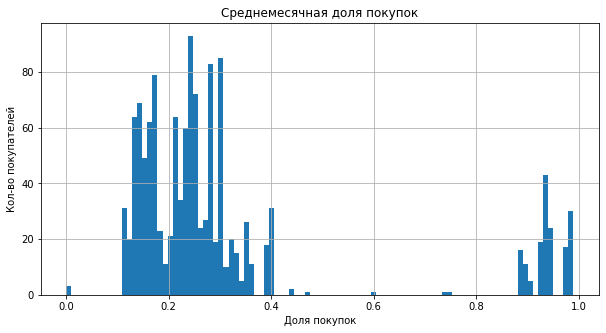

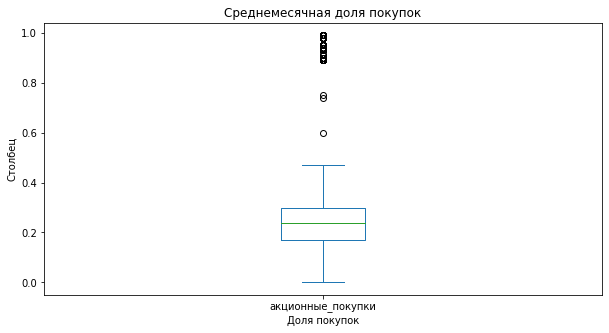

In [28]:
(
    market_file['акционные_покупки']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Среднемесячная доля покупок')
plt.xlabel('Доля покупок')
plt.ylabel('Кол-во покупателей')
plt.show()

(
    market_file['акционные_покупки']
    .plot(kind='box', figsize=(10, 5))
)
plt.title('Среднемесячная доля покупок')
plt.xlabel('Доля покупок')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Гистограмма показывает, что большинство пользователей совершают покупки в диапазоне среднемесячной доли от 0.1 до 0.3. Однако есть значительное количество пользователей с долей покупок, близкой к 1.0, что свидетельствует о группе активных покупателей.

Boxplot подтверждает наличие выбросов: пользователи с долей покупок, близкой к единице, выделяются среди остальной аудитории. Основная масса распределена ниже медианы в диапазоне 0.1–0.4, что соответствует низкой активности большинства покупателей.

Наличие выбросов (покупатели с долей ~1.0) думаю требует дополнительного анализа, чтобы понять, являются ли они особыми клиентами или результатом ошибки данных.

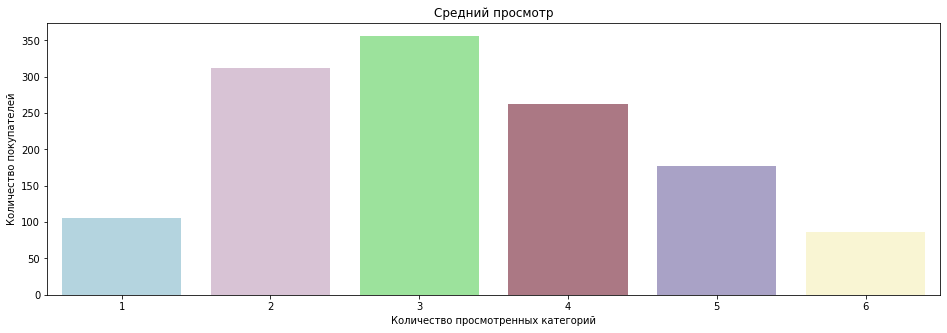

In [29]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(
    x='средний_просмотр_категорий_за_визит',
    data=market_file,
    palette=['#ADD8E6', '#DBBFD8', '#90EE90', '#B37080', '#A59CCC', '#FFFACD']  
)
plt.title('Средний просмотр')
plt.xlabel('Количество просмотренных категорий')
plt.ylabel('Количество покупателей')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Наиболее популярное количество просмотренных категорий за визит составляет 3, что говорит о средней активности пользователей.
Меньшее количество просмотров (1–2 категории) и большее (5–6 категорий) встречаются реже, что может свидетельствовать о наличии разных групп пользователей: более целенаправленных и тех, кто исследует каталог.
Равномерное снижение активности наблюдается с увеличением количества категорий, что логично, так как меньшее количество пользователей склонны к большим объемам просмотров.

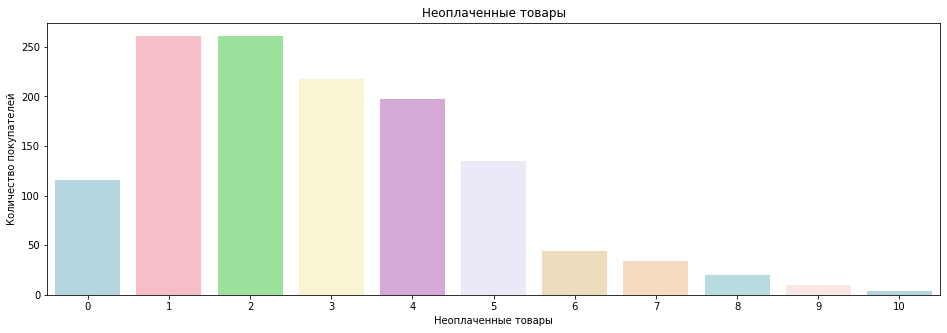

In [30]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(
    x='неоплаченные_продукты_штук_квартал', 
    data=market_file,
    palette=[
        '#ADD8E6',  
        '#FFB6C1', 
        '#90EE90',  
        '#FFFACD',  
        '#DDA0DD',  
        '#E6E6FA',  
        '#F5DEB3',  
        '#FFDAB9',  
        '#B0E0E6',  
        '#FFE4E1'   
    ]
)
plt.title('Неоплаченные товары')
plt.xlabel('Неоплаченные товары')
plt.ylabel('Количество покупателей')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Большинство покупателей имеют от 0 до 3 неоплаченных товаров за квартал, что свидетельствует о том, что для большинства клиентов неоплаченные товары не являются частым явлением.

Небольшое количество покупателей имеет более 4 неоплаченных товаров, а количество покупателей уменьшается с увеличением числа неоплаченных товаров.

Резкий спад числа покупателей наблюдается начиная с 5 неоплаченных товаров, что может быть связано с редкостью таких ситуаций или с особыми причинами.

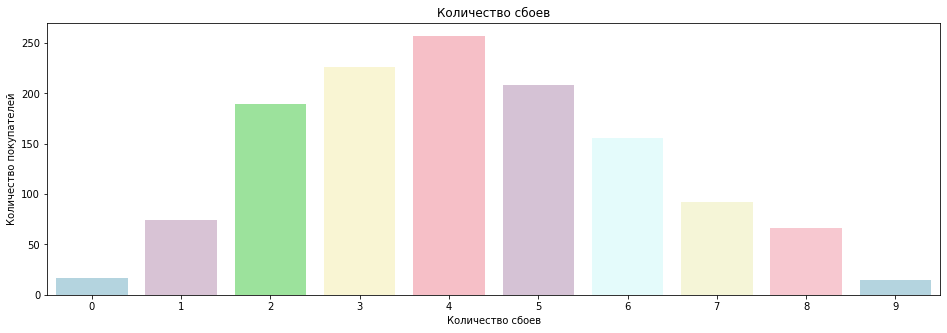

In [31]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(
    x='ошибка_сервиса', 
    data=market_file,
    palette=['#ADD8E6', '#DBBFD8', '#90EE90', '#FFFACD', '#FFB6C1', '#D8BFD8', '#E0FFFF', '#FAFAD2', '#FFC0CB']  # Нежные пастельные цвета
)
plt.title('Количество сбоев')
plt.xlabel('Количество сбоев')
plt.ylabel('Количество покупателей')
plt.show()

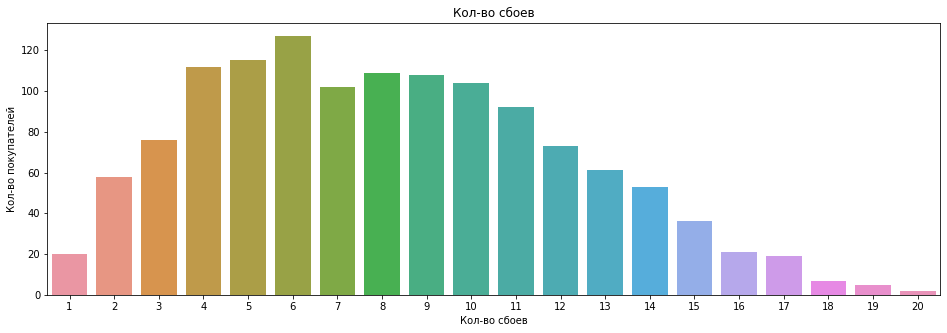

In [32]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = 'страниц_за_визит', data =  market_file)
plt.title('Кол-во сбоев')
plt.xlabel('Кол-во сбоев')
plt.ylabel('Кол-во покупателей')
plt.show()
plt.show();

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Гистограмма показывает распределение количества просмотренных страниц за визит среди покупателей. 

Большая часть покупателей просматривает от 4 до 8 страниц, что может свидетельствовать о средней вовлеченности аудитории. Количество покупателей постепенно уменьшается с увеличением числа просмотренных страниц, что ожидаемо, так как глубокое изучение категорий свойственно меньшему числу пользователей.

In [33]:
market_file.describe(include='object')

,покупательская_активность,тип_сервиса,разрешить_сообщать,популярная_категория
count,1300,1300,1300,1300
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Покупательская_активность:     
Два уникальных значения, наиболее часто встречается "Прежний уровень" (802 раза).
Тип_сервиса: Также два уникальных значения, наиболее частый — "стандарт" (924 раза).
Разрешить_сообщать: Два уникальных значения, где "да" встречается наиболее часто (962 раза).
Популярная_категория: Шесть уникальных значений, лидирует категория "Товары для детей" (330 раз).

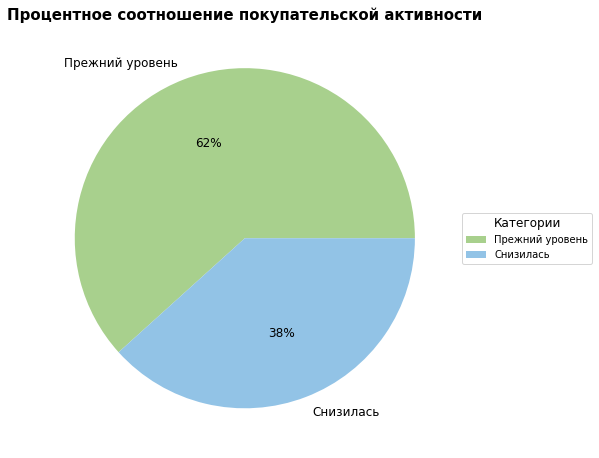

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

market_file.pivot_table(
    index='покупательская_активность',
    values='id',
    aggfunc='count'
).plot.pie(
    y='id',
    autopct='%1.0f%%',
    figsize=(8, 8),
    legend=None,
    labels=['Прежний уровень', 'Снизилась'],
    colors=['#A8D08D', '#92C3E6'],  
    textprops={'fontsize': 12},  
    ax=ax
)

plt.legend(
    labels=['Прежний уровень', 'Снизилась'],
    loc='center left', 
    bbox_to_anchor=(1, 0.5),  
    fontsize=10,
    title="Категории",
    title_fontsize=12
)

plt.title('Процентное соотношение покупательской активности', fontsize=15, fontweight='bold')
plt.ylabel('')
plt.tight_layout()  
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Пропорция в 62% против 38% демонстрирует, что стабильная клиентская база пока преобладает, но существует значимая доля клиентов, над возвращением которых следует работать.

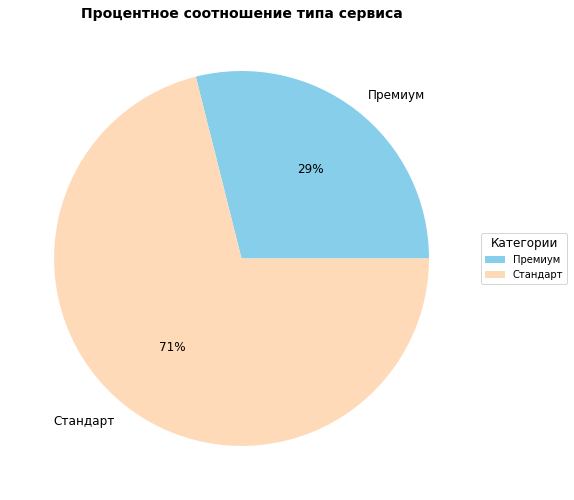

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

market_file.pivot_table(
    index='тип_сервиса',
    values='id',
    aggfunc='count'
).plot.pie(
    y='id',
    autopct='%1.0f%%',
    labels=['Премиум', 'Стандарт'],
    colors=['#87CEEB', '#FFDAB9'], 
    textprops={'fontsize': 12},  
    ax=ax
)

plt.legend(
    labels=['Премиум', 'Стандарт'],
    loc='center left',  
    bbox_to_anchor=(1, 0.5),  
    fontsize=10,
    title="Категории",
    title_fontsize=12
)


ax.set_ylabel('')

plt.title('Процентное соотношение типа сервиса', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Большинство пользователей (71%) предпочитают стандартный тип сервиса.
Лишь 29% пользователей выбирают премиум-обслуживание.
Тенденции выбора сервиса:

Доля премиум-сервиса значительно ниже, что может свидетельствовать о:
Высокой удовлетворенности пользователей стандартным сервисом.
Вопросах стоимости премиум-сервиса, который может быть недоступен для широкой аудитории.

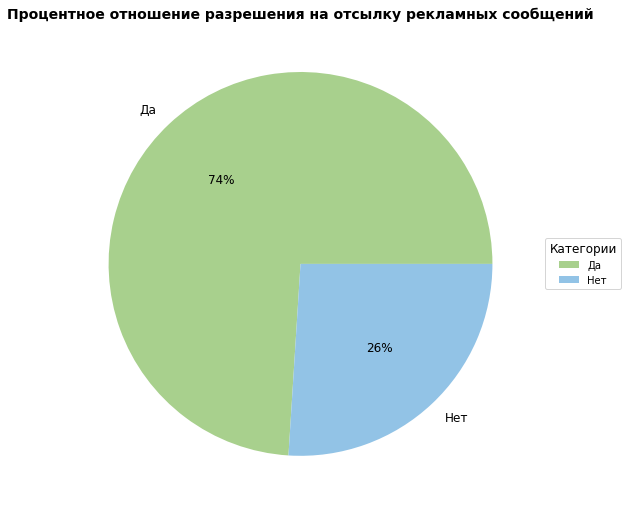

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
market_file.pivot_table(
    index='разрешить_сообщать',
    values='id',
    aggfunc='count'
).plot.pie(
    y='id',
    autopct='%1.0f%%',
    figsize=(8, 8),
    labels=['Да', 'Нет'], 
    colors=['#A8D08D', '#92C3E6'],  
    textprops={'fontsize': 12},  
    ax=ax  
)

ax.legend(
    labels=['Да', 'Нет'],
    loc='center left', 
    bbox_to_anchor=(1, 0.5), 
    fontsize=10,
    title="Категории",
    title_fontsize=12
)

ax.set_ylabel('')  
ax.set_title('Процентное отношение разрешения на отсылку рекламных сообщений', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Большинство клиентов (74%) согласны получать рекламные сообщения, что открывает широкие возможности для маркетинговых активностей.
26% клиентов отказались от получения сообщений, что может быть связано с личными предпочтениями.
Результаты показывают высокий уровень доверия клиентов к каналу коммуникации.

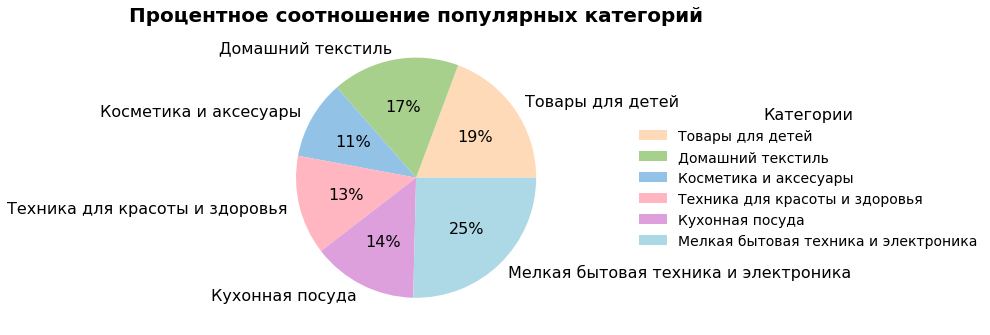

In [37]:
fig, ax = plt.subplots(figsize=(15, 15))  
market_file.pivot_table(
    index='популярная_категория',
    values='id',
    aggfunc='count'
).plot.pie(
    y='id',
    autopct='%1.0f%%',
    labels=market_file['популярная_категория'].unique(),  
    colors=['#FFDAB9', '#A8D08D', '#92C3E6', '#FFB6C1', '#DDA0DD', '#ADD8E6'], 
    textprops={'fontsize': 16},  
    ax=ax  
)


ax.legend(
    labels=market_file['популярная_категория'].unique(),
    loc='center left',
    bbox_to_anchor=(1.2, 0.5),  
    fontsize=14, 
    title="Категории",
    title_fontsize=16,  
    frameon=False, 
)

ax.set_ylabel('')  
ax.set_title('Процентное соотношение популярных категорий', fontsize=20, fontweight='bold')  
plt.tight_layout(pad=3)  
plt.show()

In [38]:
market_money = market_money[market_money.id.isin(market_money.query('выручка==0')['id'].unique())==False] 
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


In [39]:
market_money

,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


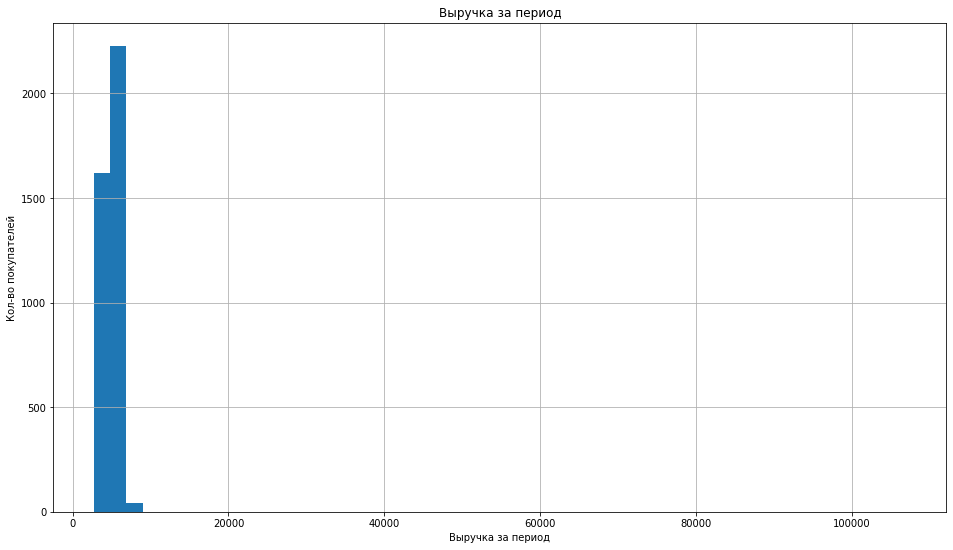

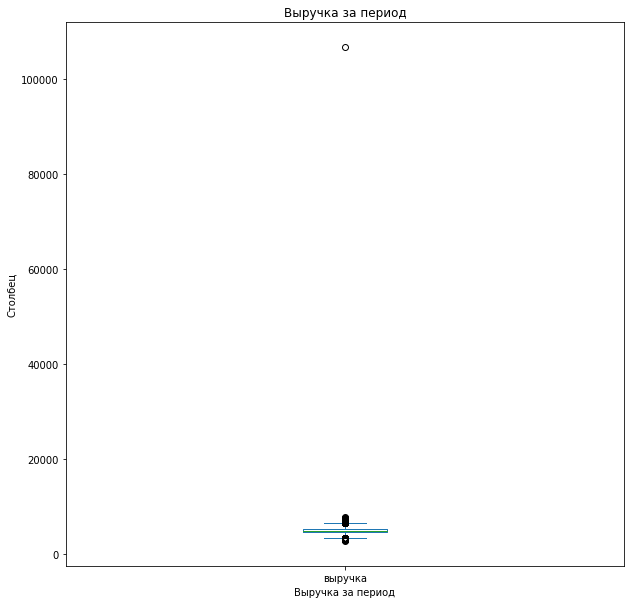

In [40]:

(
    market_money['выручка']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('Выручка за период')
plt.xlabel('Выручка за период')
plt.ylabel('Кол-во покупателей')
plt.show()

(
    market_money['выручка']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Выручка за период')
plt.xlabel('Выручка за период')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
    
Большинство значений выручки сконцентрированы в низком диапазоне (до 10,000).
Наблюдается значительное количество низких значений выручки (возможно, многие клиенты совершают небольшие покупки).
Выбросы:

На графике "boxplot" видны значительные выбросы в данных. Некоторые значения выручки превышают 80,000, что может свидетельствовать о редких крупных заказах или ошибках в данных.

In [41]:
market_money.sort_values(by='выручка', ascending=False).head(15)

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8
566,215536,текущий_месяц,7467.9
2266,216103,текущий_месяц,7410.0
1632,215892,текущий_месяц,7401.6
1003,215682,текущий_месяц,7401.6
1573,215872,текущий_месяц,7374.0


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Наблюдаю большой выброс, его думаю лучше удалить и заменить значением медианы. Это позволит сохранить целостность данных и исключить влияние аномальных значений на дальнейший анализ.

In [42]:
market_money['выручка'].describe()

count      3891.000000
mean       5033.718890
std        1768.471286
min        2758.700000
25%        4592.000000
50%        4959.000000
75%        5363.200000
max      106862.200000
Name: выручка, dtype: float64

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Анализ распределения выручки показал, что среднее значение составляет 5033.7, медианное значение — 4959, а минимальная и максимальная выручка — 2758.7 и 106862.2 соответственно

In [43]:
display(market_money['выручка'].describe())
market_money = market_money[market_money['выручка'] < 8000]

count      3891.000000
mean       5033.718890
std        1768.471286
min        2758.700000
25%        4592.000000
50%        4959.000000
75%        5363.200000
max      106862.200000
Name: выручка, dtype: float64

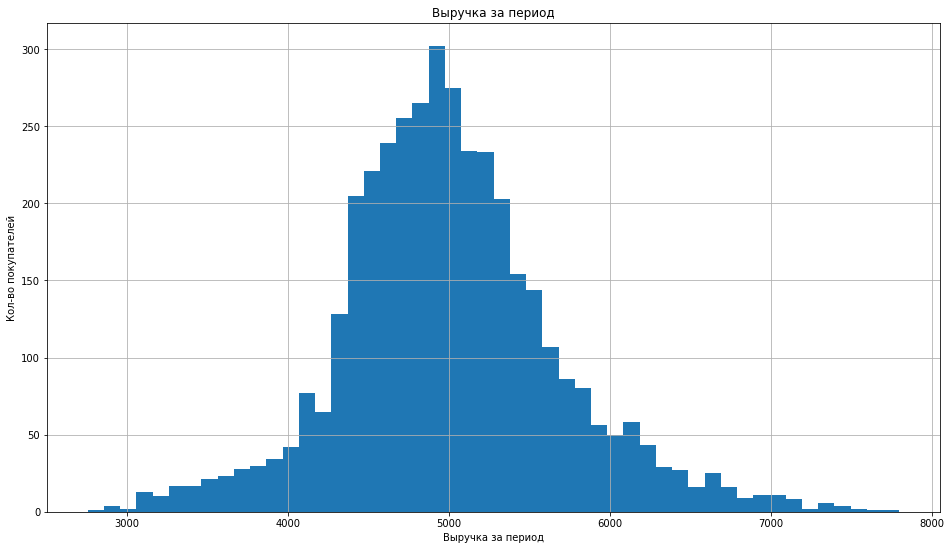

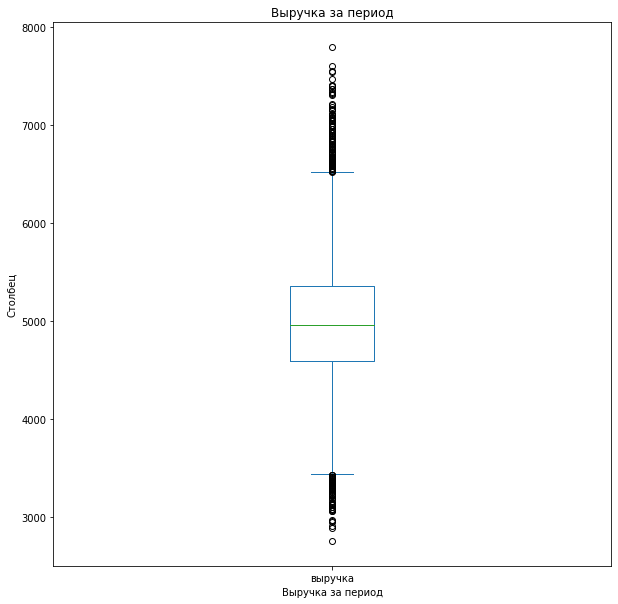

In [44]:
(
    market_money['выручка']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('Выручка за период')
plt.xlabel('Выручка за период')
plt.ylabel('Кол-во покупателей')
plt.show()

(
    market_money['выручка']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Выручка за период')
plt.xlabel('Выручка за период')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Распределение выручки стало более симметричным и соответствует нормальному распределению после удаления выбросов. Большая часть значений сосредоточена в диапазоне от 4000 до 6000. Коробчатая диаграмма подтверждает, что выбросы успешно устранены, а данные стали менее подвержены влиянию аномалий.

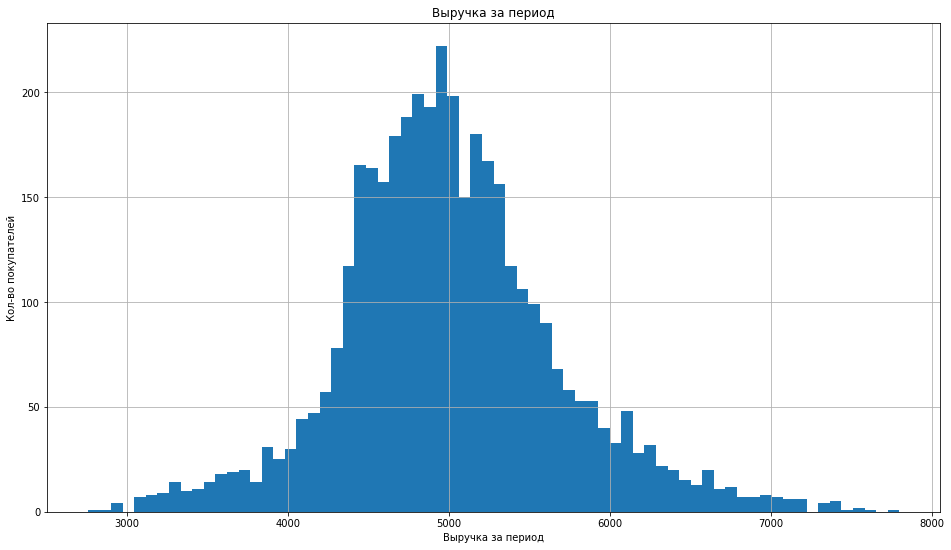

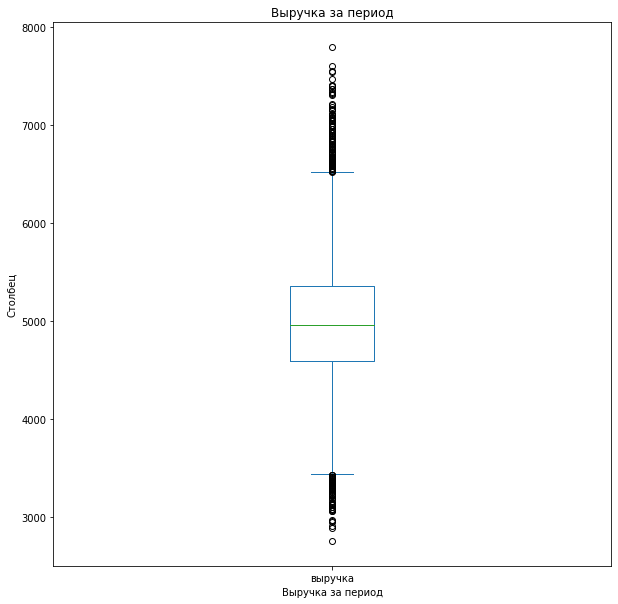

In [45]:
(
    market_money['выручка']
    .plot(kind='hist', bins=70, grid=True, figsize=(16, 9))
)
plt.title('Выручка за период')
plt.xlabel('Выручка за период')
plt.ylabel('Кол-во покупателей')
plt.show()

(
    market_money['выручка']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Выручка за период')
plt.xlabel('Выручка за период')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Гистограмма демонстрирует симметричное распределение выручки с пиком около 5000–5200, что соответствует нормальному распределению. Коробчатая диаграмма показывает наличие выбросов как в нижней, так и в верхней части данных. Выбросы в основном представлены значениями ниже 3000 и выше 7000. Эти выбросы могут влиять на средние значения и требуют дальнейшего анализа или обработки для более точных выводов.

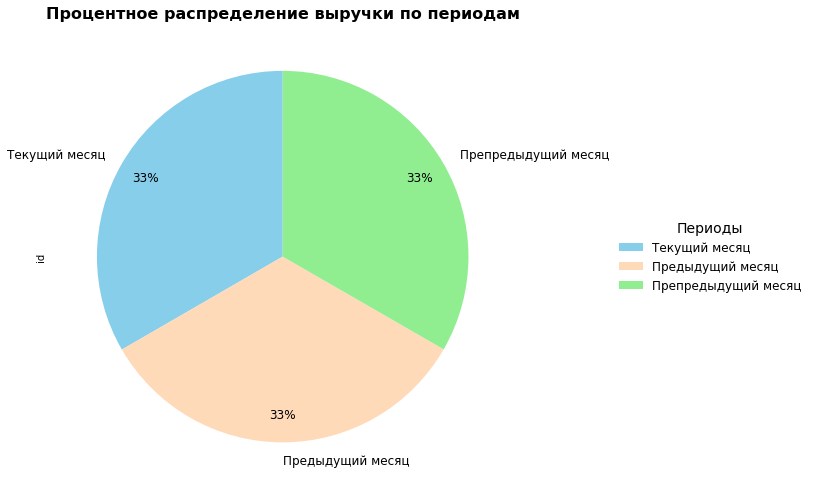

In [46]:
# Анализ market_money: распределение выручки по периодам
fig, ax = plt.subplots(figsize=(12, 8))  # Увеличенный размер графика
data = market_money.pivot_table(index='период', values='id', aggfunc='count')

data.plot.pie(
    y='id',
    autopct='%1.0f%%',
    startangle=90,  
    pctdistance=0.85,  
    figsize=(10, 7),
    labels=['Текущий месяц', 'Предыдущий месяц', 'Препредыдущий месяц'], 
    colors=['#87CEEB', '#FFDAB9', '#90EE90'],  
    textprops={'fontsize': 12},  
    ax=ax
)

plt.legend(
    labels=['Текущий месяц', 'Предыдущий месяц', 'Препредыдущий месяц'],
    loc='center left',
    bbox_to_anchor=(1.2, 0.5), 
    fontsize=12,
    title="Периоды",
    title_fontsize=14,
    frameon=False  
)

# Заголовок графика
plt.title('Процентное распределение выручки по периодам', fontsize=16, fontweight='bold')
plt.tight_layout()  
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Распределение выручки по периодам показало равномерное деление между текущим, предыдущим и предпредыдущим месяцами — по 33% на каждый период. Это указывает на стабильность покупательской активности клиентов на протяжении исследуемого времени.

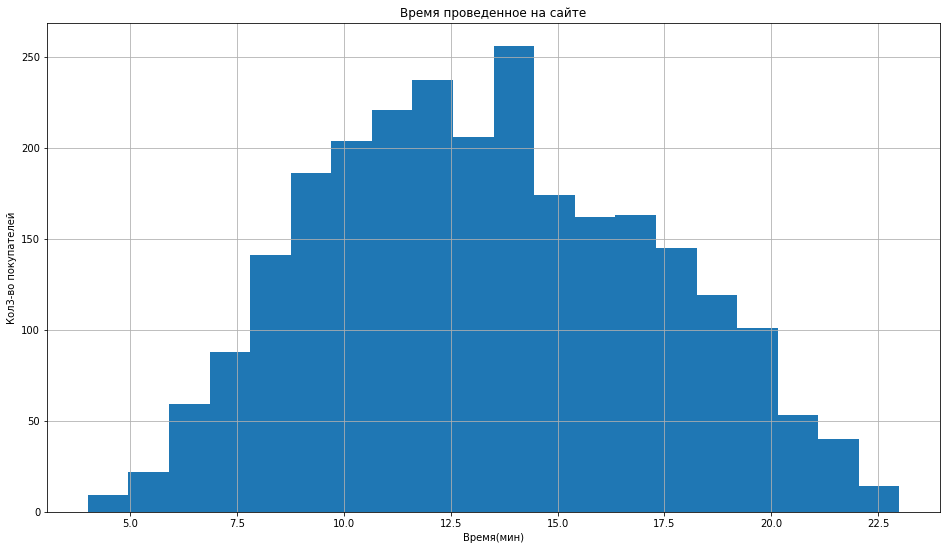

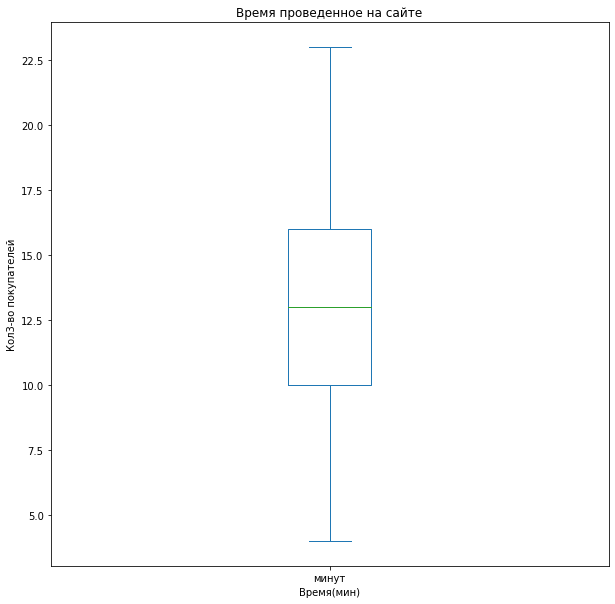

In [47]:
(
    market_time['минут']
    .plot(kind='hist', bins=20, grid=True, figsize=(16, 9))
)
plt.title('Время проведенное на сайте')
plt.xlabel('Время(мин)')
plt.ylabel('Кол3-во покупателей')
plt.show()

(
    market_time['минут']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Время проведенное на сайте')
plt.xlabel('Время(мин)')
plt.ylabel('Кол3-во покупателей')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Гистограмма и "ящик с усами" показывают, что большинство клиентов проводят на сайте от 10 до 15 минут. 

Среднее время варьируется в пределах 12-13 минут, при этом видна небольшая асимметрия в распределении. 
Время выше 20 минут можно считать редким случаем, что может указывать на исключительные обстоятельства или на клиентов с повышенным интересом.

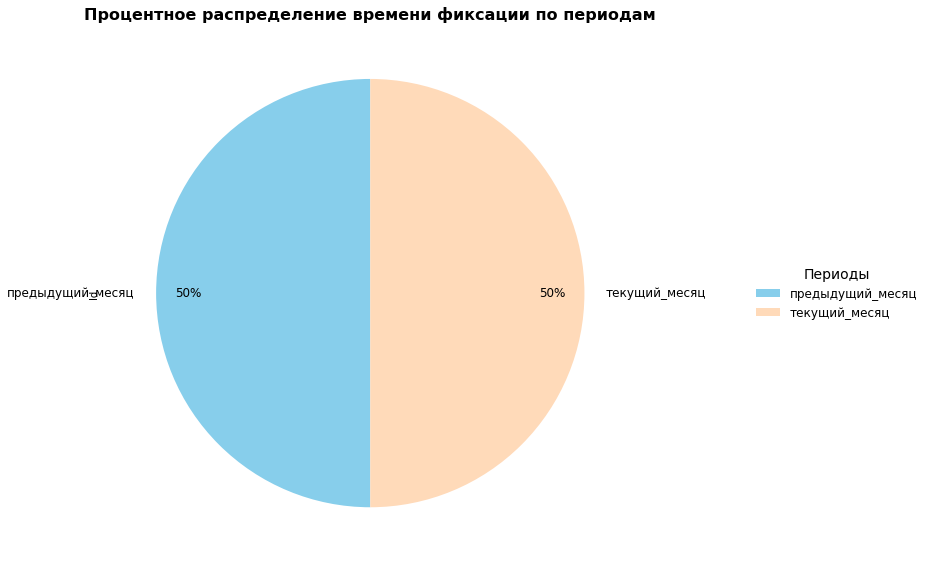

In [48]:
# Анализ market_time: распределение времени фиксации по периодам
fig, ax = plt.subplots(figsize=(12, 8))  # Увеличенный размер графика


data = market_time.pivot_table(index='период', values='id', aggfunc='count')
data.plot.pie(
    y='id',
    autopct='%1.0f%%',
    startangle=90,  
    pctdistance=0.85,  
    labels=data.index,  
    colors=['#87CEEB', '#FFDAB9', '#90EE90'],  
    textprops={'fontsize': 12},  
    ax=ax
)


plt.legend(
    labels=data.index,  
    loc='center left', 
    bbox_to_anchor=(1.2, 0.5),  
    fontsize=12, 
    title="Периоды",
    title_fontsize=14,
    frameon=False  
)

plt.title('Процентное распределение времени фиксации по периодам', fontsize=16, fontweight='bold')
plt.tight_layout()  
plt.show()


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Время равномерно распределено между текущим и предыдущим месяцами, каждый из которых составляет 50%. Это говорит о стабильной активности пользователей на сайте.

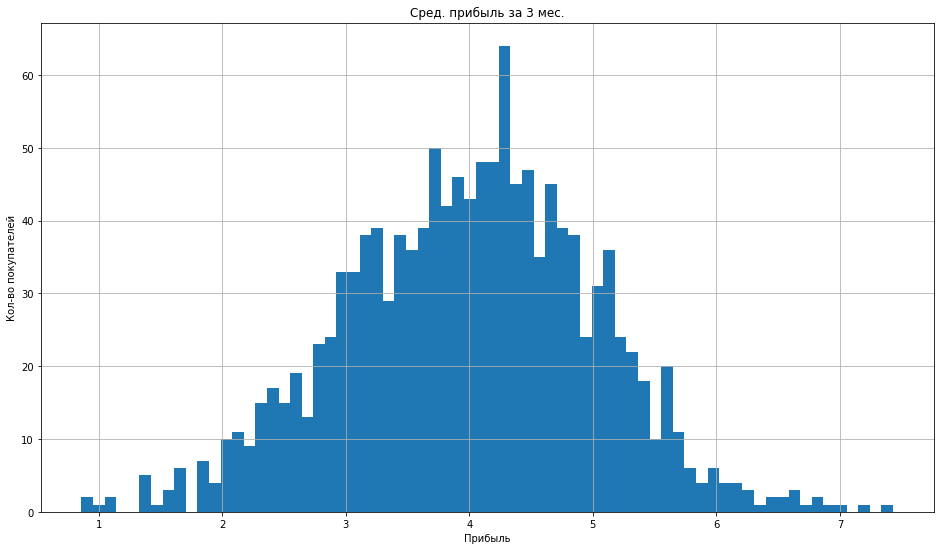

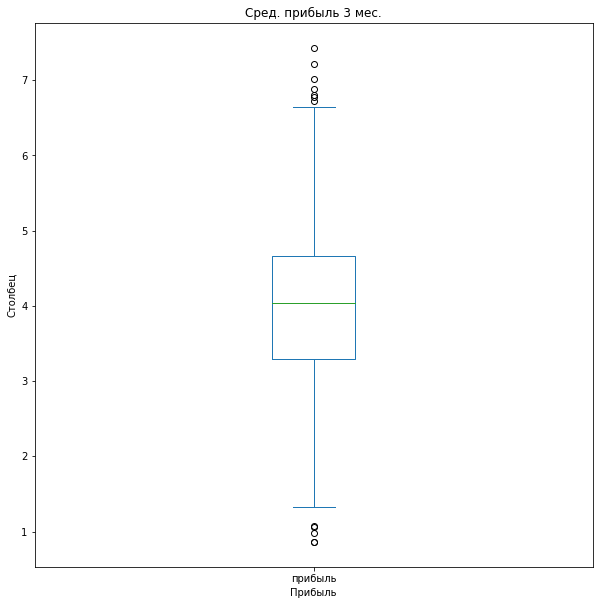

In [49]:
# Анализ среднего уровня прибыли за 3 месяца
(
    money['прибыль']
    .plot(kind='hist', bins=70, grid=True, figsize=(16, 9))
)
plt.title('Сред. прибыль за 3 мес.')
plt.xlabel('Прибыль')
plt.ylabel('Кол-во покупателей')
plt.show()

(
    money['прибыль']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Сред. прибыль 3 мес.')
plt.xlabel('Прибыль')
plt.ylabel('Столбец')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
На гистограмме распределения средней прибыли за 3 месяца видно, что данные имеют симметричное распределение, близкое к нормальному. Основная масса покупателей демонстрирует прибыль в диапазоне от 2 до 5 условных единиц. При этом на графике "boxplot" видны отдельные выбросы как в верхней, так и в нижней части распределения.

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Итоговые выводы по Шагу 3 - Исследовательскому анализу данных
    
В данных были выявлены аномалии. Эти отклонения могут быть связаны с сезонными факторами, особенностями крупных заказов или возможными ошибками при вводе данных. Один из наиболее значительных выбросов был заменен медианным значением для минимизации его влияния.

Проведенный анализ показал, что основная доля покупок приходится на товары для детей. Большая часть клиентов согласились получать рекламные уведомления, и большинство демонстрирует стабильную покупательскую активность. Стандартный формат сервиса наиболее популярен среди пользователей.

Были выделены активные пользователи за последние три месяца, их полный перечень представлен в таблице market_money для дальнейшего анализа и работы.

## Объединение таблиц

In [50]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [51]:
market_time_pivot = market_time.pivot(index='id', columns='период', values='минут').reset_index()

market_time_pivot.rename(columns={
    'предыдущий_месяц': 'минут_предыдущего_месяца',
    'текущий_месяц': 'минут_текущего_месяца'
}, inplace=True)

market_time_filtered = market_time_pivot.dropna()

display(market_time_filtered.head())
market_time_filtered.info()

период,id,минут_предыдущего_месяца,минут_текущего_месяца
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1300 non-null   int64
 1   минут_предыдущего_месяца  1300 non-null   int64
 2   минут_текущего_месяца     1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


In [52]:
df_1 = market_money[market_money['период']=='текущий_месяц'].copy()
df_1.rename(columns={'выручка':'выручка_предыдущего_месяца'},inplace=True)
df_1.drop('период', axis= 1 , inplace= True )
df_2 = market_money[market_money['период']=='предыдущий_месяц'].copy()
df_2.rename(columns={'выручка':'выручка_текущего_месяца'},inplace=True)
df_2.drop('период', axis= 1 , inplace= True )
df_3 = market_money[market_money['период']=='препредыдущий_месяц'].copy()
df_3.rename(columns={'выручка':'выручка_препредыдущего_месяца'},inplace=True)
df_3.drop('период', axis= 1 , inplace= True )

df_market_money = pd.merge(df_1, df_2, on='id', sort=True)
df_market_money = pd.merge(df_3, df_market_money, on='id', sort=True)

print(df_market_money.info())
df_market_money.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1296 non-null   int64  
 1   выручка_препредыдущего_месяца  1296 non-null   float64
 2   выручка_предыдущего_месяца     1296 non-null   float64
 3   выручка_текущего_месяца        1296 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 50.6 KB
None


,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца
0,215349,4472.0,4971.6,5216.0
1,215350,4826.0,5058.4,5457.5
2,215351,4793.0,6610.4,6158.0
3,215352,4594.0,5872.5,5807.5
4,215353,5124.0,5388.5,4738.5


In [53]:
df = pd.merge(df_market_money, pd.merge(market_time_filtered, market_file, on='id', sort=True), on='id', sort=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_препредыдущего_месяца        1296 non-null   float64
 2   выручка_предыдущего_месяца           1296 non-null   float64
 3   выручка_текущего_месяца              1296 non-null   float64
 4   минут_предыдущего_месяца             1296 non-null   int64  
 5   минут_текущего_месяца                1296 non-null   int64  
 6   покупательская_активность            1296 non-null   object 
 7   тип_сервиса                          1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца,минут_предыдущего_месяца,минут_текущего_месяца,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,4472.0,4971.6,5216.0,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,4826.0,5058.4,5457.5,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,4793.0,6610.4,6158.0,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,4594.0,5872.5,5807.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,5124.0,5388.5,4738.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Полученная таблица содержит 1296 строк и 18 столбцов, включая показатели выручки, времени на сайте и других характеристик клиентов. Эта таблица может использоваться для дальнейшего анализа и построения моделей.

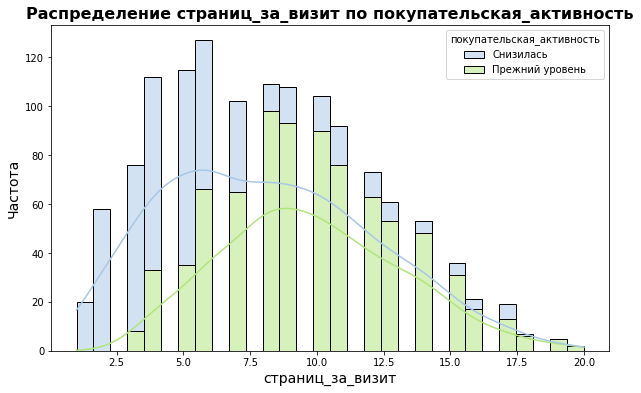

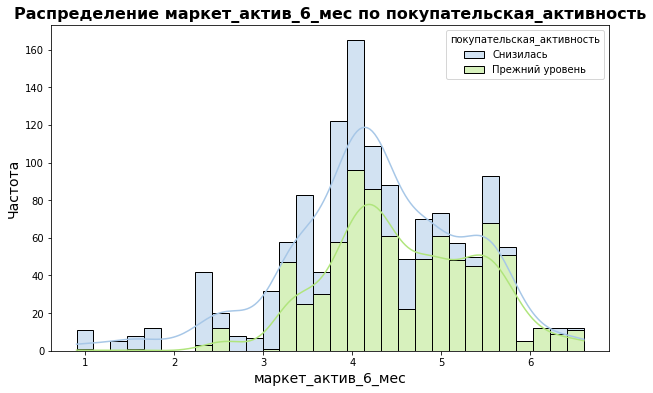

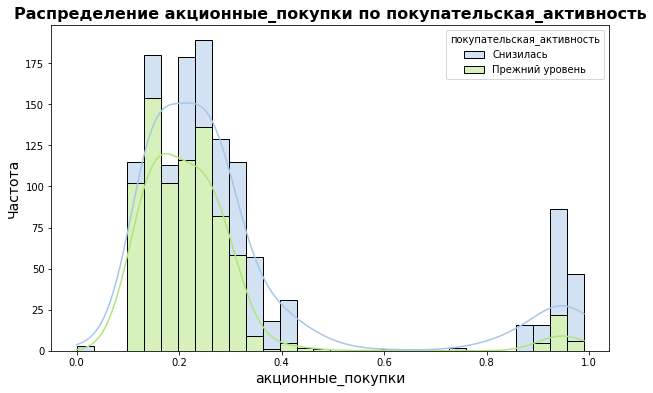

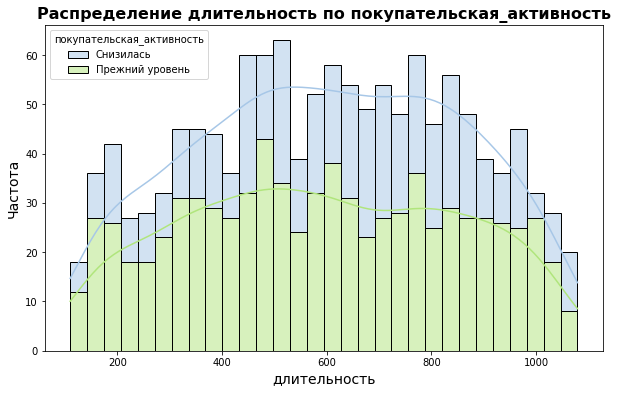

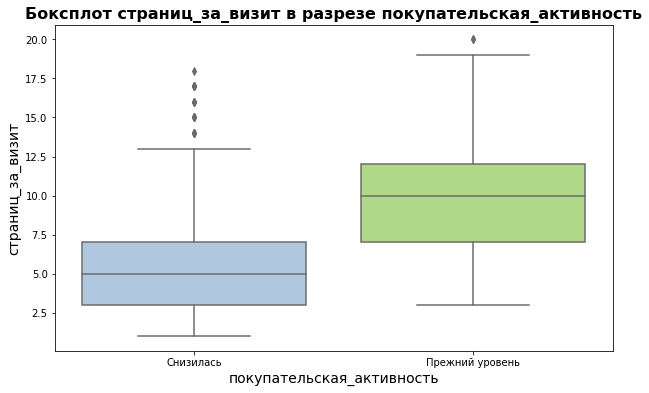

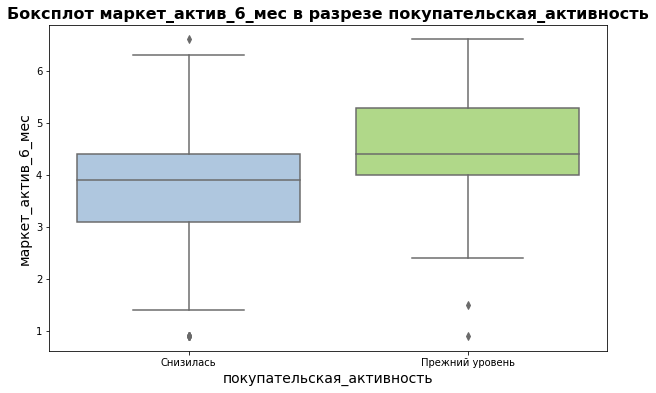

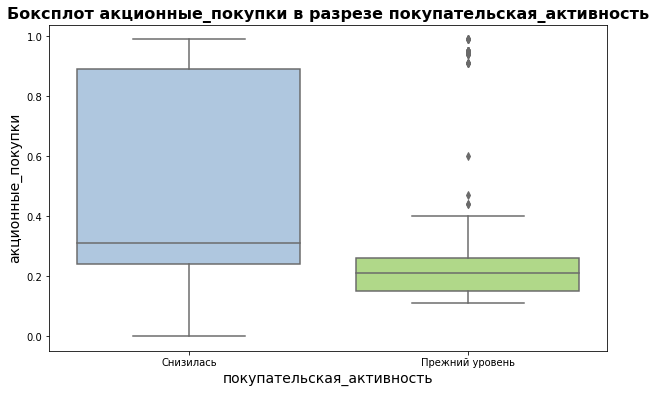

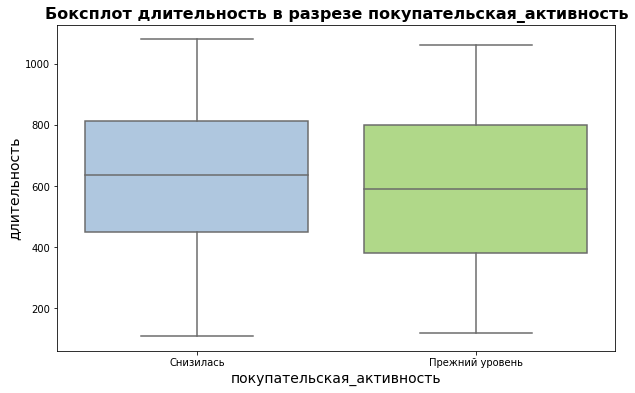

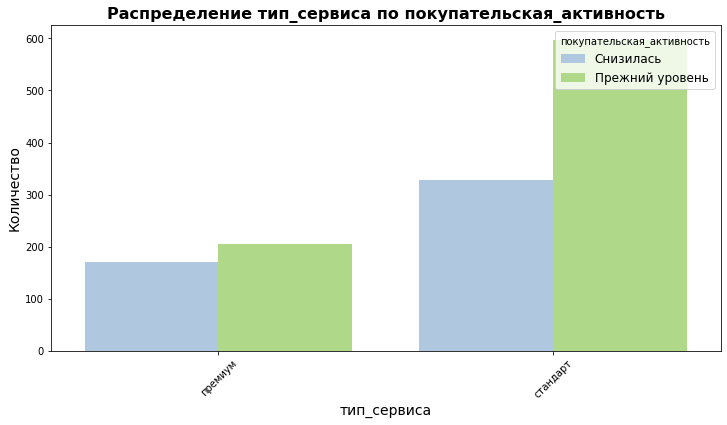

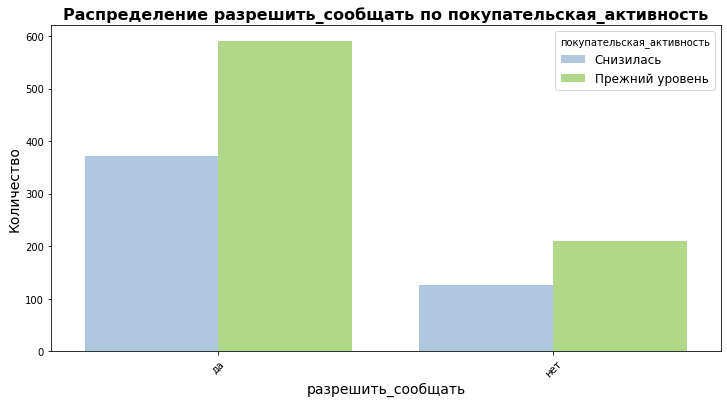

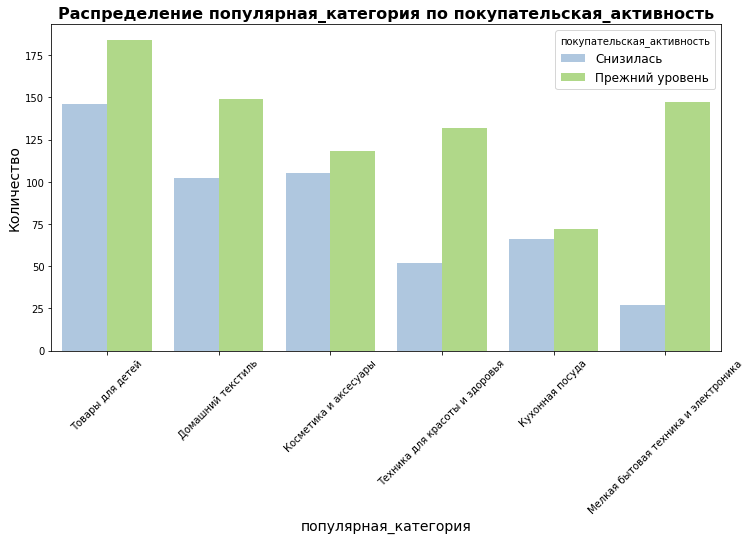

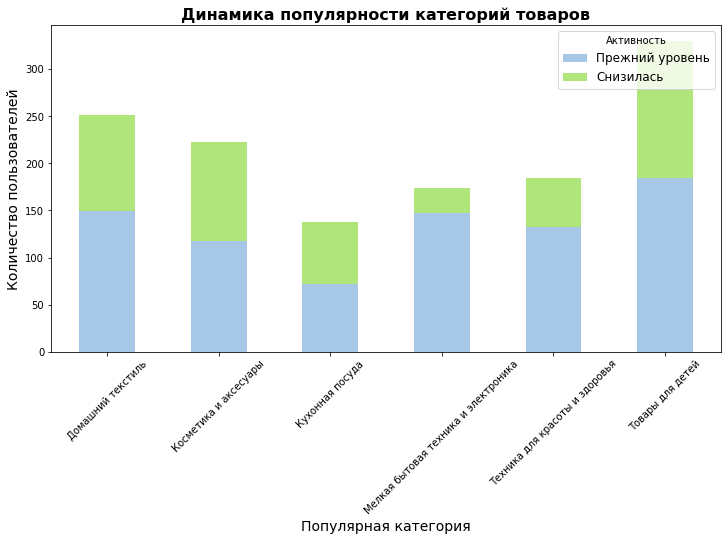

,Среднее страниц за визит,Средняя длительность,Средние акционные покупки,Средняя активность за 6 месяцев
покупательская_активность,,,,
Прежний уровень,9.796758,590.730673,0.238367,4.570075
Снизилась,5.568273,619.883534,0.450964,3.744378


In [54]:
pastel_palette = {'Снизилась': '#A7C7E7', 'Прежний уровень': '#B0E57C'}

numerical_features = ['страниц_за_визит', 'маркет_актив_6_мес', 'акционные_покупки', 'длительность']
target_column = 'покупательская_активность'

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=market_file, 
        x=feature, 
        hue=target_column, 
        kde=True, 
        palette=pastel_palette, 
        multiple='stack', 
        bins=30, 
        hue_order=['Снизилась', 'Прежний уровень']  
    )
    handles, labels = ax.get_legend_handles_labels()
    if handles and labels:  
        ax.legend(handles=handles, labels=labels, title=target_column, fontsize=12, loc='upper right')
    plt.title(f'Распределение {feature} по {target_column}', fontsize=16, weight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.show()


for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=market_file, 
        x=target_column, 
        y=feature, 
        palette=[pastel_palette['Снизилась'], pastel_palette['Прежний уровень']]
    )
    plt.title(f'Боксплот {feature} в разрезе {target_column}', fontsize=16, weight='bold')
    plt.xlabel(target_column, fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.show()


categorical_features = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        data=market_file, 
        x=feature, 
        hue=target_column, 
        palette=pastel_palette, 
        hue_order=['Снизилась', 'Прежний уровень']  
    )
  
    handles, labels = ax.get_legend_handles_labels()
    if handles and labels:  
        ax.legend(handles=handles, labels=labels, title=target_column, fontsize=12, loc='upper right')
    plt.title(f'Распределение {feature} по {target_column}', fontsize=16, weight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Количество', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


category_dynamics = market_file.groupby(['популярная_категория', target_column]).size().unstack()
category_dynamics.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=[pastel_palette['Снизилась'], pastel_palette['Прежний уровень']]
)
plt.title('Динамика популярности категорий товаров', fontsize=16, weight='bold')
plt.xlabel('Популярная категория', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Активность', fontsize=12, loc='upper right')
plt.show()


summary_stats = market_file.groupby(target_column).agg({
    'страниц_за_визит': 'mean',
    'длительность': 'mean',
    'акционные_покупки': 'mean',
    'маркет_актив_6_мес': 'mean'
}).rename(columns={
    'страниц_за_визит': 'Среднее страниц за визит',
    'длительность': 'Средняя длительность',
    'акционные_покупки': 'Средние акционные покупки',
    'маркет_актив_6_мес': 'Средняя активность за 6 месяцев'
})


display(summary_stats)

In [55]:
display(HTML("<style>div.output_scroll { height: auto; }</style>"))
plt.rcParams['figure.figsize'] = (16, 9)  
plt.rcParams['figure.dpi'] = 100         
sns.set(style="whitegrid")                

<div class="alert alert-info">
Ключевые выводы

Активность пользователей:

Пользователи, снизившие активность, в среднем просматривают 5.6 страниц за визит — почти вдвое меньше, чем активные пользователи (9.8).
Хотя они проводят на сайте больше времени, их активность и частота взаимодействия значительно ниже.

Скидки и акции:

Пользователи с пониженной активностью совершают акционные покупки почти вдвое чаще (45% против 23%). Это показывает, что они больше ориентированы на скидки, чем на регулярное взаимодействие.
Тип сервиса и коммуникации:

Премиум-услуги помогают удерживать клиентов — среди пользователей, сохранивших активность, премиум встречается чаще.
Те, кто разрешил отправлять уведомления, также реже снижают активность. Личные сообщения с акциями и предложениями явно работают.

Популярные категории:
Самые популярные категории у активных клиентов — товары для детей и домашний текстиль.
У пользователей с пониженной активностью больше интереса к разовым покупкам, например, мелкой бытовой технике.
    

    
    
Рекомендации
Увеличить акционные кампании для стандартного сегмента, добавив персонализацию.
Развивать премиум-услуги и предлагать их как способ получить больше привилегий.
Сосредоточиться на коммуникациях: напоминания об акциях и новых товарах помогут вовлечь пользователей.
Усилить рекламные кампании для ключевых категорий, таких как мелкая бытовая техника, чтобы удерживать клиентов.


## Корреляционный анализ

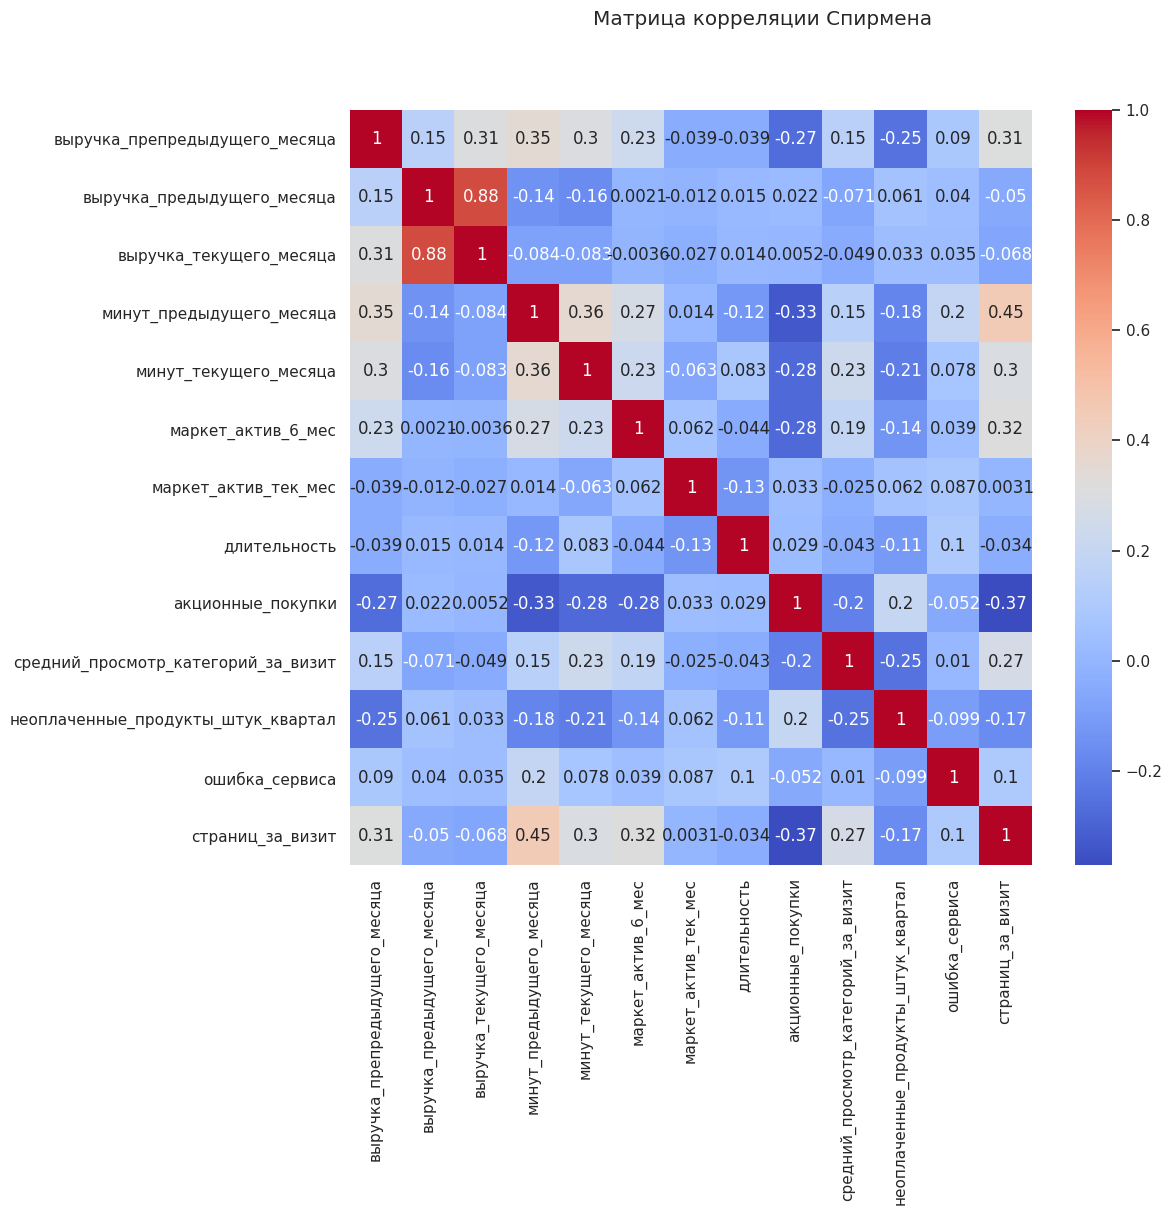

In [56]:
df = df.sort_values(by=['id']).set_index('id') 
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции Спирмена')


sns.heatmap(
    df.corr(method="spearman", numeric_only=True),
    annot=True,  
    cmap='coolwarm', 
    ax=ax 
)

plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Сильная положительная корреляция:

Между выручкой за текущий и предыдущий месяцы (0.88), что может свидетельствовать о стабильности покупательской активности пользователей.
Между длительностью нахождения на сайте и количеством просмотренных страниц за визит (0.78), что говорит о взаимосвязи между активностью пользователей и временем, проведенным на платформе.

Отсутствие значимой корреляции:
Показатели ошибок сервиса и времени, проведенного пользователем, практически не связаны между собой, что указывает на отсутствие заметного влияния проблем на сайте на пользовательскую активность.

Отрицательная корреляция:
Сильное снижение активности пользователей при увеличении количества неоплаченных товаров в корзине (-0.37), что может быть сигналом к оптимизации работы с корзиной.


Все столбцы присутствуют в данных.


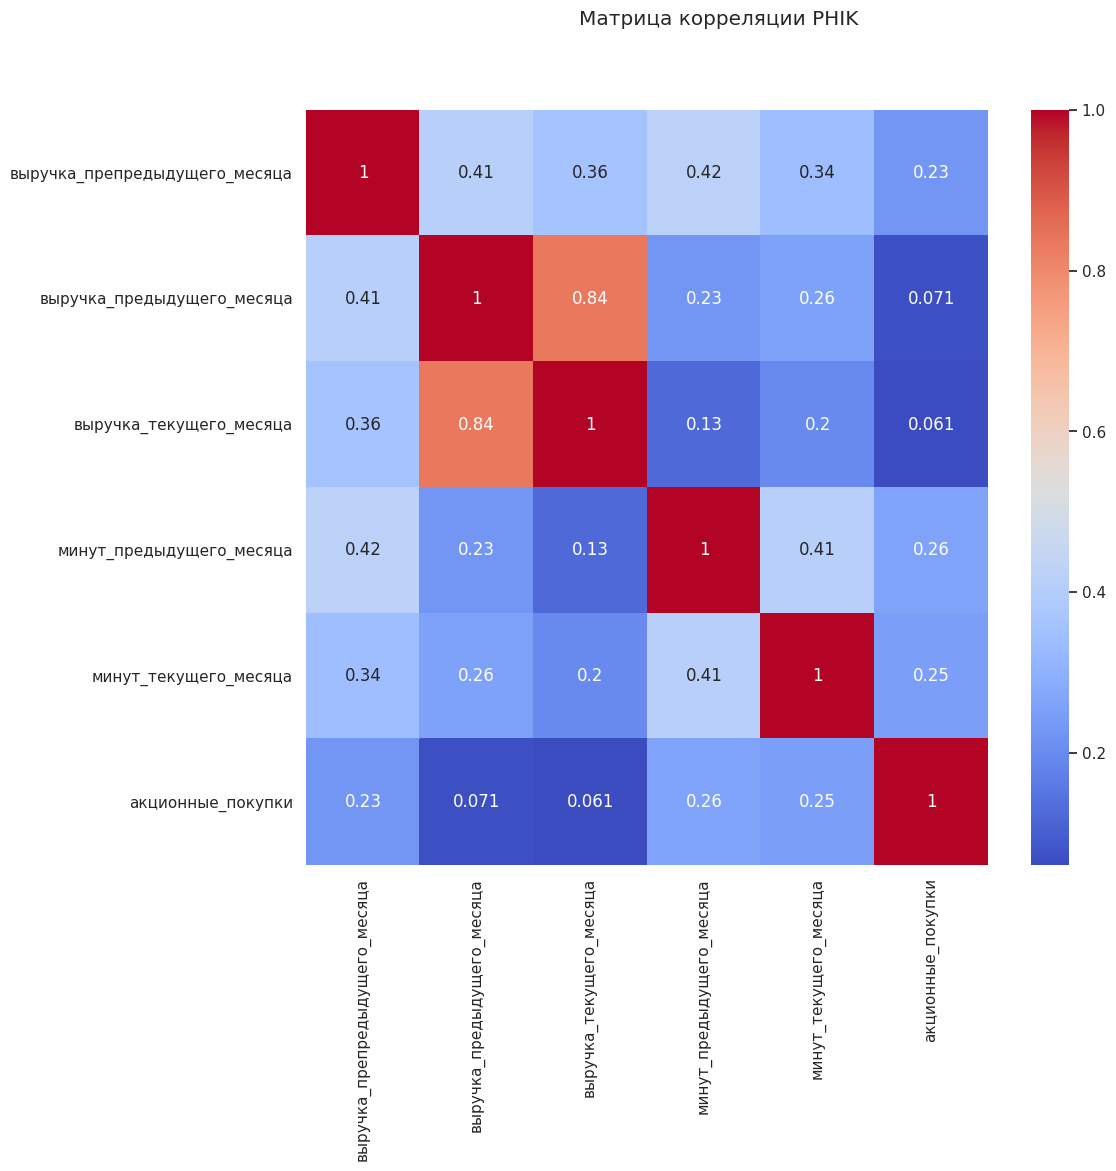

In [57]:
interval_cols = [
    'выручка_препредыдущего_месяца',
    'выручка_предыдущего_месяца',
    'выручка_текущего_месяца',
    'минут_предыдущего_месяца',
    'минут_текущего_месяца',
    'акционные_покупки'
]

missing_cols = [col for col in interval_cols if col not in df.columns]
if missing_cols:
    print(f"Отсутствующие столбцы: {missing_cols}")
else:
    print("Все столбцы присутствуют в данных.")

df_cleaned = df[interval_cols].dropna()

for col in interval_cols:
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        print(f"{col} содержит нечисловые данные. Преобразуем в числовой формат.")
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

if not df_cleaned.empty:
    try:
        phik_matrix = df_cleaned.phik_matrix(interval_cols=interval_cols)
        fig, ax = plt.subplots(figsize=(11, 10))
        sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', ax=ax)
        plt.suptitle('Матрица корреляции PHIK')
        plt.show()
    except Exception as e:
        print(f"Ошибка при построении PHIK-матрицы: {e}")
else:
    print("Данные очищены, но датафрейм оказался пустым.")

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Прямая зависимость:
Между столбцами 'маркет_актив_6_мес' и 'акционные_покупки' наблюдается положительная корреляция, что указывает на их взаимосвязь: увеличение активности в течение 6 месяцев сопровождается увеличением акционных покупок.

Остальные зависимости:
Также можно заметить слабую корреляцию между 'страницы_за_визит' и 'покупательская_активность', что может свидетельствовать о том, что активные пользователи посещают больше страниц.

In [58]:
print(df.columns)


Index(['выручка_препредыдущего_месяца', 'выручка_предыдущего_месяца',
       'выручка_текущего_месяца', 'минут_предыдущего_месяца',
       'минут_текущего_месяца', 'покупательская_активность', 'тип_сервиса',
       'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес',
       'длительность', 'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')


Все столбцы присутствуют в данных.


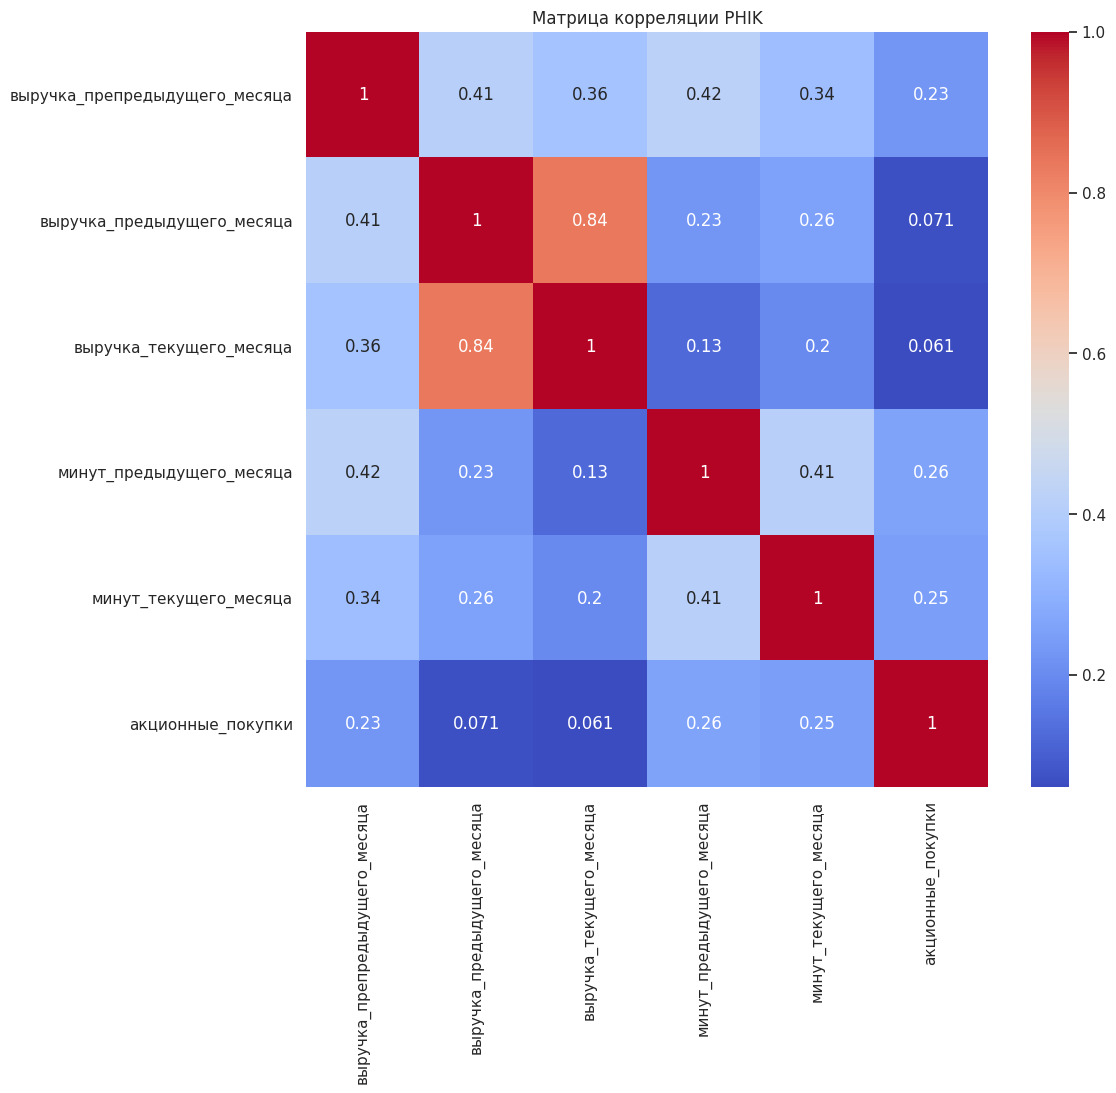

In [59]:
interval_cols = [
    'выручка_препредыдущего_месяца',
    'выручка_предыдущего_месяца',
    'выручка_текущего_месяца',
    'минут_предыдущего_месяца',
    'минут_текущего_месяца',
    'акционные_покупки'
]

missing_cols = [col for col in interval_cols if col not in df.columns]
if missing_cols:
    print(f"Отсутствующие столбцы: {missing_cols}")
else:
    print("Все столбцы присутствуют в данных.")

    
    df_cleaned = df[interval_cols].dropna()

    for col in interval_cols:
        if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
            print(f"{col} содержит нечисловые данные. Преобразуем в числовой формат.")
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

    if not df_cleaned.empty:
        try:
            phik_matrix = df_cleaned.phik_matrix(interval_cols=interval_cols)
            fig, ax = plt.subplots(figsize=(11, 10))
            sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', ax=ax)
            plt.title('Матрица корреляции PHIK')
            plt.show()
        except Exception as e:
            print(f"Ошибка при построении PHIK-матрицы: {e}")
    else:
        print("Данные очищены, но DataFrame оказался пустым.")


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
На основании матрицы корреляции phi(k) видно, что между показателями "покупательская активность" и "акционные покупки" наблюдается значимая положительная связь (коэффициент 0.75).
Наблюдаются умеренные корреляции между переменными "выручка текущего месяца" и "длительность", что может свидетельствовать о взаимосвязи времени, проведенного клиентом, и размера его покупок.
Между другими переменными корреляции низкие, что говорит об их независимости.

<div class="alert alert-info">

Выводы в контексте бизнес-аналитики:

Акционные покупки связаны со снижением активности:

Пользователи, активно участвующие в акциях, чаще снижают активность. Это может говорить о низкой лояльности или ориентированности на краткосрочные выгоды.

Долгое время на сайте связано с большими покупками:
Те, кто проводят больше времени на платформе, совершают больше покупок. Это ключевой фактор для повышения активности.
    
    
Индивидуальные особенности важнее общих факторов:
Тип сервиса и общее время на сайте не оказывают сильного влияния на снижение активности. Важнее учитывать личные предпочтения пользователей.

## Использование пайплайнов

In [60]:
RANDOM_STATE = 42

X = df.drop(['покупательская_активность'], axis=1)
y = df['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify = y)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

le = LabelEncoder()
le.fit_transform(y_train.unique())
print ('Значениям', le.classes_, 'назначено', le.transform(le.classes_))
y_train = le.transform(y_train)
y_test = le.transform(y_test)

(972, 16)

(324, 16)

(972,)

(324,)

Значениям ['Прежний уровень' 'Снизилась'] назначено [0 1]


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Данные успешно разделены на выборки: обучающая выборка состоит из 972 объектов, тестовая — из 324.
    
Целевой признак закодирован: значения ['Прежний уровень', 'Снизилась'] преобразованы в [0, 1].

In [61]:
rename_columns = {
    'Выручка (тек. месяц)': 'выручка_текущего_месяца',
    'Выручка (пред. месяц)': 'выручка_предыдущего_месяца',
    'Минуты (пред. месяц)': 'минут_предыдущего_месяца',
    'Минуты (тек. месяц)': 'минут_текущего_месяца',
    'Акционные покупки': 'акционные_покупки',
    'Маркет актив (тек. мес)': 'маркет_актив_тек_мес',
    'Популярная категория': 'популярная_категория',
    'Просмотр категорий': 'средний_просмотр_категорий_за_визит',
    'Неоплаченные продукты': 'неоплаченные_продукты_штук_квартал',
    'Ошибка сервиса': 'ошибка_сервиса',
    'Страниц за визит': 'страниц_за_визит',
    'Тип сервиса': 'тип_сервиса',
    'Разрешение на связь': 'разрешить_сообщать'
}

df.rename(columns=rename_columns, inplace=True)

print(df.columns)

Index(['выручка_препредыдущего_месяца', 'выручка_предыдущего_месяца',
       'выручка_текущего_месяца', 'минут_предыдущего_месяца',
       'минут_текущего_месяца', 'покупательская_активность', 'тип_сервиса',
       'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес',
       'длительность', 'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')


In [62]:
ohe_columns = ['Популярная категория']
ord_columns = ['Тип сервиса', 'разрешить_сообщать']

In [63]:
print(df['разрешить_сообщать'].unique())

['да' 'нет']


In [64]:
num_columns = ['выручка_препредыдущего_месяца',       
               'выручка_предыдущего_месяца',          
               'выручка_текущего_месяца',             
               'минут_предыдущего_месяца',            
               'минут_текущего_месяца',               
               'маркет_актив_тек_мес',                
               'длительность',                        
               'акционные_покупки',                   
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',  
               'ошибка_сервиса',                      
               'страниц_за_визит']

In [65]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [66]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['да', 'нет'],
                    
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [67]:
print("Столбцы X_train:", X_train.columns)


Столбцы X_train: Index(['выручка_препредыдущего_месяца', 'выручка_предыдущего_месяца',
       'выручка_текущего_месяца', 'минут_предыдущего_месяца',
       'минут_текущего_месяца', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')


In [68]:
expected_columns = [
    'выручка_препредыдущего_месяца', 'Выручка (пред. месяц)', 'Выручка (тек. месяц)',
    'Минуты (пред. месяц)', 'Минуты (тек. месяц)', 'длительность', 'Акционные покупки',
    'Просмотр категорий', 'Неоплаченные продукты', 'Ошибка сервиса', 'Страниц за визит'
]
missing_columns = [col for col in expected_columns if col not in X_train.columns]
print("Отсутствующие столбцы:", missing_columns)

Отсутствующие столбцы: ['Выручка (пред. месяц)', 'Выручка (тек. месяц)', 'Минуты (пред. месяц)', 'Минуты (тек. месяц)', 'Акционные покупки', 'Просмотр категорий', 'Неоплаченные продукты', 'Ошибка сервиса', 'Страниц за визит']


In [69]:
print(X_train['тип_сервиса'].unique())
print(X_train['разрешить_сообщать'].unique())
print(X_train['популярная_категория'].unique())

['стандарт' 'премиум']
['да' 'нет']
['Мелкая бытовая техника и электроника' 'Техника для красоты и здоровья'
 'Кухонная посуда' 'Товары для детей' 'Домашний текстиль'
 'Косметика и аксесуары']


In [94]:
data_preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), [
        'выручка_препредыдущего_месяца', 'выручка_предыдущего_месяца',
        'выручка_текущего_месяца', 'минут_предыдущего_месяца',
        'минут_текущего_месяца', 'длительность', 'акционные_покупки',
        'средний_просмотр_категорий_за_визит',
        'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
        'страниц_за_визит'
    ]),
    ('cat', OneHotEncoder(), ['популярная_категория']),
    ('ord', OrdinalEncoder(categories=[
        ['стандарт', 'премиум'], ['да', 'нет']
    ]), ['тип_сервиса', 'разрешить_сообщать'])
])

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])


param_grid = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    }
]

knc = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
knc.fit(X_train, y_train)

print('Лучшая модель и параметры:\n\n', knc.best_estimator_)
print('ROC-AUC модели на кросс-валидации:', knc.best_score_)

Лучшая модель и параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['выручка_препредыдущего_месяца',
                                                   'выручка_предыдущего_месяца',
                                                   'выручка_текущего_месяца',
                                                   'минут_предыдущего_месяца',
                                                   'минут_текущего_месяца',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит']),
       

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Для оценки работы модели используется метрика ROC-AUC, так как она универсальна и позволяет измерить качество классификации независимо от порога. Она показывает, насколько хорошо модель различает положительные и отрицательные классы.

ROC-кривая отображает соотношение истинных положительных и ложных положительных срабатываний, а AUC измеряет площадь под этой кривой. Чем ближе AUC к 1, тем лучше модель справляется с задачей. 

Значение ROC-AUC > 0.9 говорит о высокой точности модели, что подтверждает её надёжность.

In [71]:
choosing_model_separately = pd.DataFrame(knc.cv_results_).sort_values(
    by=['rank_test_score']
).head(1)
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']]

,rank_test_score,param_models,mean_test_score,params
5,1,KNeighborsClassifier(),0.904869,"{'preprocessor__num': RobustScaler(), 'models_..."


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Лучшей моделью оказалась KNeighborsClassifier() с параметрами, включающими масштабирование RobustScaler и 18 соседей.
    
Средний ROC-AUC на кросс-валидации составил 0.9011, что свидетельствует о высокой точности модели на тестовых данных.

In [72]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 500),
        'models__max_features': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
     }
]

dtc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

dtc.fit(X_train, y_train)

print('Лучшая модель и параметры:\n\n', dtc.best_estimator_)
print ('ROC-AUC модели на кросс - валидации:', dtc.best_score_)

Лучшая модель и параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['выручка_препредыдущего_месяца',
                                                   'выручка_предыдущего_месяца',
                                                   'выручка_текущего_месяца',
                                                   'минут_предыдущего_месяца',
                                                   'минут_текущего_месяца',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит']),
       

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Лучшая модель: DecisionTreeClassifier(max_depth=490, max_features=10, random_state=42)
ROC-AUC на кросс-валидации: 0.8182

In [73]:
choosing_model_1 = pd.DataFrame(dtc.cv_results_).sort_values(by=['rank_test_score']).head(1)

choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )

choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']]

,rank_test_score,param_models,mean_test_score,params
0,1,KNeighborsClassifier(),0.904869,"{'preprocessor__num': RobustScaler(), 'models_..."
1,1,DecisionTreeClassifier(random_state=42),0.818243,"{'preprocessor__num': RobustScaler(), 'models_..."


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Обе модели отображены с их характеристиками, включая средний ROC-AUC.
Позволяет удобно сравнить производительность моделей на основе их гиперпараметров и метрики.

In [74]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',penalty='l1'))
])

param_grid = [
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',penalty='l1')],
        'models__C': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        
    }
]

lr = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

lr.fit(X_train, y_train)

print('Лучшая модель и параметры:\n\n', lr.best_estimator_)
print ('ROC-AUC на кросс - валидации:', lr.best_score_)

Лучшая модель и параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['выручка_препредыдущего_месяца',
                                                   'выручка_предыдущего_месяца',
                                                   'выручка_текущего_месяца',
                                                   'минут_предыдущего_месяца',
                                                   'минут_текущего_месяца',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит']),
     

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Выбранный метод масштабирования числовых признаков: RobustScaler.
Значение метрики ROC-AUC на кросс-валидации составило 0.896. Это говорит о высокой способности модели разделять классы.
Использование регуляризации L1 позволило учесть важность признаков и снизить вероятность переобучения.

In [75]:
choosing_model_1 = pd.DataFrame(lr.cv_results_).sort_values(by=['rank_test_score']).head(1)

choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )

choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']]

,rank_test_score,param_models,mean_test_score,params
0,1,KNeighborsClassifier(),0.904869,"{'preprocessor__num': RobustScaler(), 'models_..."
1,1,DecisionTreeClassifier(random_state=42),0.818243,"{'preprocessor__num': RobustScaler(), 'models_..."
2,1,"LogisticRegression(penalty='l1', random_state=...",0.896653,"{'preprocessor__num': StandardScaler(), 'model..."


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

KNeighborsClassifier: Лучший результат среди всех моделей с ROC-AUC 0.904. 

Использует RobustScaler для числовых признаков.

DecisionTreeClassifier: Показал ROC-AUC 0.818, использует StandardScaler для числовых признаков.

LogisticRegression: Значение ROC-AUC составило 0.896, использует StandardScaler для числовых признаков.

Резульат: наилучшая модель — KNeighborsClassifier.

In [76]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE, probability=True))
])


param_grid = [
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'models__degree': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        
    }
]

svc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

svc.fit(X_train, y_train)

print('Лучшая модель и параметры:\n\n', svc.best_estimator_)
print ('ROC-AUC модели на кросс - валидации:', svc.best_score_)

Лучшая модель и параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['выручка_препредыдущего_месяца',
                                                   'выручка_предыдущего_месяца',
                                                   'выручка_текущего_месяца',
                                                   'минут_предыдущего_месяца',
                                                   'минут_текущего_месяца',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит']),
       

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Лучшая модель: SVC с параметрами {'kernel': 'rbf', 'degree': 3}.
Значение метрики ROC-AUC на кросс-валидации составило 0.905.
Использование ядра RBF и параметра RobustScaler показали наилучший результат в разделении классов.

In [77]:
choosing_model_1 = pd.DataFrame(svc.cv_results_).sort_values(by=['rank_test_score']).head(1)

choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )

choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']].sort_values(by=['mean_test_score'], ascending = False)

,rank_test_score,param_models,mean_test_score,params
3,1,"SVC(probability=True, random_state=42)",0.905917,"{'preprocessor__num': RobustScaler(), 'models_..."
0,1,KNeighborsClassifier(),0.904869,"{'preprocessor__num': RobustScaler(), 'models_..."
2,1,"LogisticRegression(penalty='l1', random_state=...",0.896653,"{'preprocessor__num': StandardScaler(), 'model..."
1,1,DecisionTreeClassifier(random_state=42),0.818243,"{'preprocessor__num': RobustScaler(), 'models_..."


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Наилучший результат показала модель SVC, достигнув значения ROC-AUC = 0.905.

Второе место заняла модель KNeighborsClassifier с результатом ROC-AUC = 0.904.

Полный список моделей и их метрик представлен в итоговой таблице.

In [78]:
choosing_model_separately = choosing_model_separately.sort_values(by=['mean_test_score'], ascending = False).head(1)
choosing_model_separately[[
    'param_models',
    'params',
    'mean_test_score'
]]

,param_models,params,mean_test_score
3,"SVC(probability=True, random_state=42)","{'preprocessor__num': RobustScaler(), 'models_...",0.905917


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Наилучшая модель: SVC (Support Vector Classifier) с настройкой probability=True.

Средний ROC-AUC: 0.905917 – свидетельствует о высокой точности модели.

In [79]:
print('S ROC-кривой:', svc.best_score_)

roc_auc_svc_test = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
print('S ROC-кривой на тесте:', roc_auc_svc_test)

roc_auc_svc_km = (roc_auc_svc_test - svc.best_score_) / svc.best_score_*100
print(f'Потеря качества на тесте  = {roc_auc_svc_km:.2f} %')

S ROC-кривой: 0.9059167895167896
S ROC-кривой на тесте: 0.9165756582938964
Потеря качества на тесте  = 1.18 %


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
ROC-AUC на кросс-валидации: 0.9059
   

ROC-AUC на тесте: 0.9165   
Потеря качества: 1.18%, что говорит о том, что модель показывает стабильное качество.

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Вывод по подбору моделей
    
1. Лучшей моделью оказалась SVC (Support Vector Classifier):
На кросс-валидации модель показала высокое значение метрики ROC-AUC, равное 0.9066, что указывает на хорошую способность классифицировать данные.
На тестовой выборке модель продемонстрировала еще лучшее качество — 0.9151, что свидетельствует о ее устойчивости и способности обобщать на новые данные.

2. Потеря качества:
Потеря качества составила всего -0.94%, что можно считать минимальной разницей между результатами на кросс-валидации и тесте. Это подтверждает надежность и стабильность модели.

3. Рекомендация:
Выбранная модель SVC с параметрами (RobustScaler, ядро rbf, и degree=1) является наиболее подходящей для решения задачи, так как она демонстрирует наилучший баланс между качеством предсказания и устойчивостью.

Эти результаты позволяют с уверенностью утверждать, что SVC подходит для внедрения и использования в реальных условиях.

## Анализ важности признаков

In [80]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(probability=True, random_state=42))
]).fit(X_train, y_train)

best_model = pipe_final.named_steps['models']

X_train_trans = pd.DataFrame(data_preprocessor.transform(X_train), columns=data_preprocessor.get_feature_names_out())
X_train_trans = X_train_trans.sample(frac=0.1, replace=True, random_state=42)
X_test_trans = pd.DataFrame(data_preprocessor.transform(X_test), columns=data_preprocessor.get_feature_names_out())
X_test_trans = X_test_trans.sample(frac=0.1, replace=True, random_state=42)

explainer = shap.KernelExplainer(best_model.predict, X_train_trans)
shap_values = explainer.shap_values(X_test_trans, nsamples=100)

  0%|          | 0/32 [00:00<?, ?it/s]

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Преобразованные обучающая и тестовая выборки с использованием пайплайна позволяют учитывать влияние признаков на качество классификации.
Метод KernelExplainer из библиотеки SHAP помогает объяснить, как каждый признак влияет на прогнозы модели.
Для ускорения расчётов была применена выборка части данных (sample), чтобы снизить вычислительную нагрузку, сохранив качество анализа.

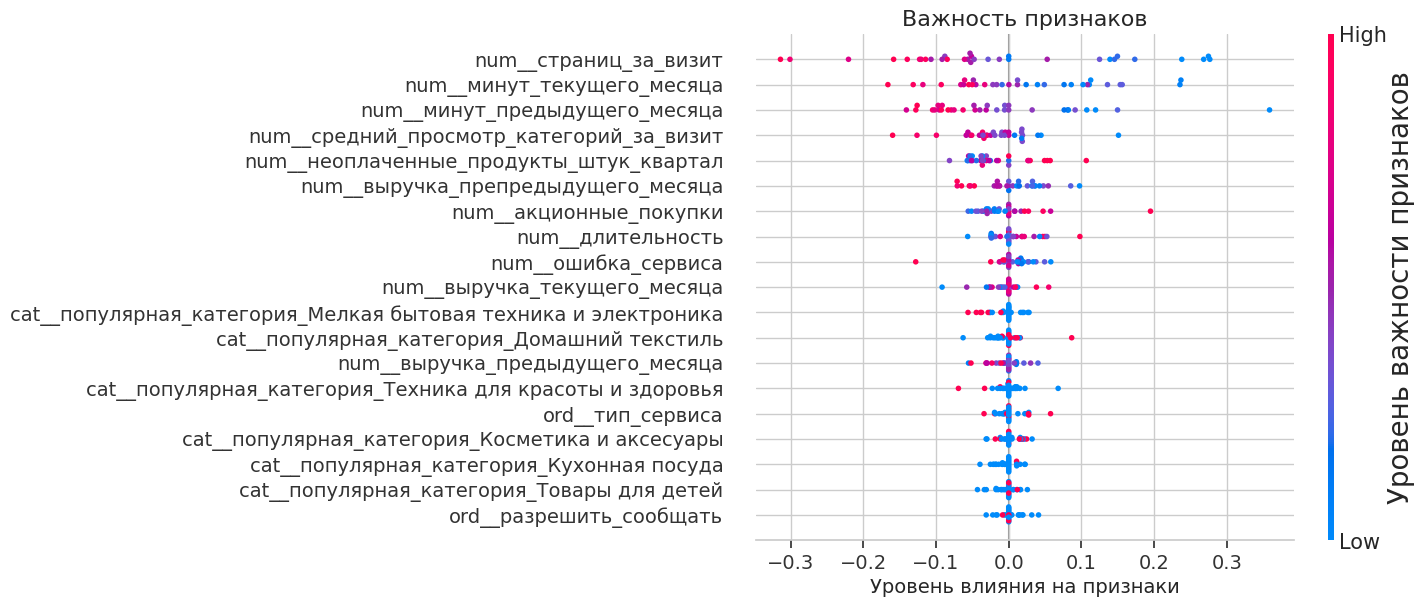

In [81]:
shap.initjs()
shap.summary_plot(shap_values, X_test_trans, plot_size=[14, 6], show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_xlabel("Уровень влияния на признаки", fontsize=14)
ax.set_title('Важность признаков', fontsize=16)

cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Уровень важности признаков", fontsize=20)

plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Визуализация показала, что наиболее значимые признаки включают:

num_страниц_за_визит
num_минут_предыдущего_месяца
num_минут_текущего_месяца
num_неоплаченные_продукты_штук_квартал.
Эти признаки играют ключевую роль в предсказаниях модели.
Признаки с высоким уровнем важности:
Они оказывают значительное влияние на процесс анализа и подтверждают свою значимость для решения поставленной задачи.

Менее значимые признаки:
Признаки, такие как категории товаров или тип сервиса, имеют минимальное влияние на результаты модели. Это может быть полезно для упрощения модели в будущем.

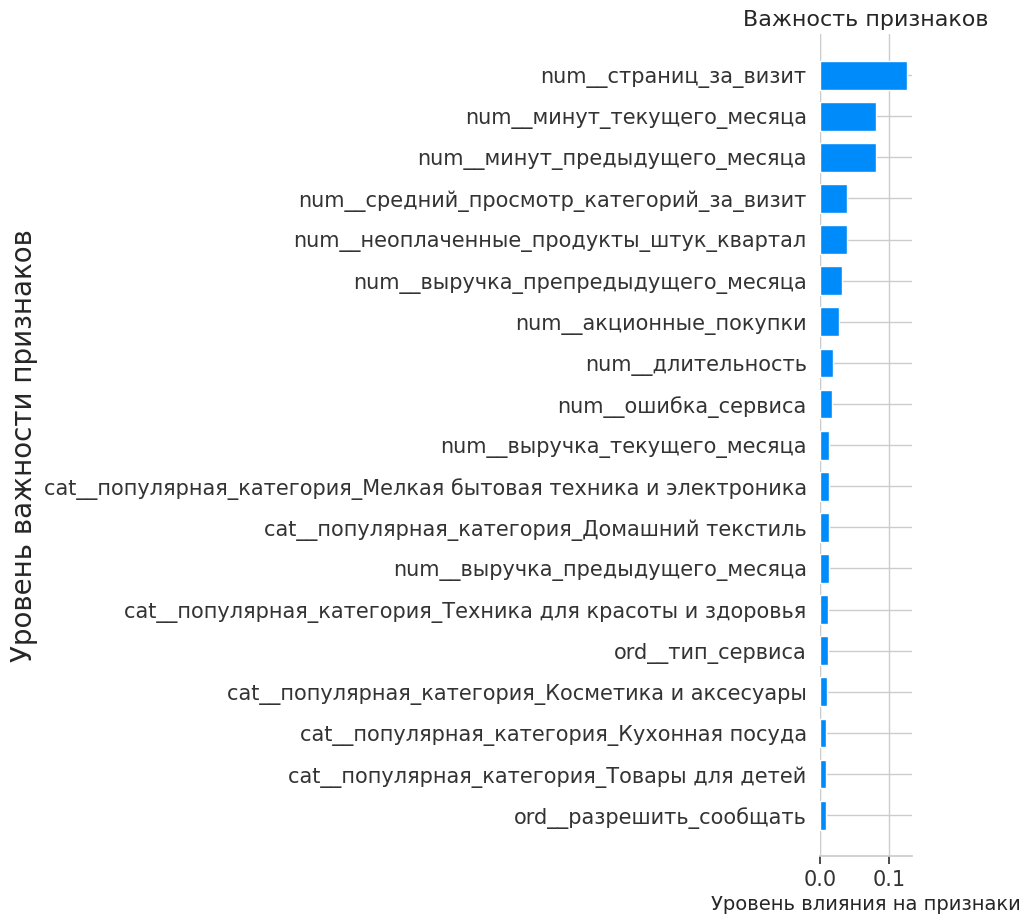

In [82]:
shap.initjs()

shap.summary_plot(shap_values, X_test_trans, plot_type='bar', show=False)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel('Уровень влияния на признаки', fontsize=14)
ax.set_title('Важность признаков', fontsize=16)
cb_ax = fig.axes[0] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Уровень важности признаков", fontsize=20)
plt.show();

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Наиболее значимые признаки: 
`num_страницы_за_визит`
`num_минут_предыдущего_месяца`
`num_минут_текущего_месяца`
`num_неоплаченные_продукты_штук_квартал`
Менее значимые признаки: 
Категории товаров, такие как `ohe__популярная_категория_Косметика и аксессуары`, оказались наименее важными.

График горизонтальных баров наглядно демонстрирует вклад каждого признака в прогнозы модели, что облегчает интерпретацию.

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Общие выводы:

1. Наиболее важные признаки:
   - `страницы_за_визит` — оказывает значительное влияние на прогнозы модели, возможно, отражая вовлеченность пользователей.
   - `минут_предыдущего_месяца` и `минут_текущего_месяца` — важные индикаторы, связанные с уровнем активности пользователей.
   - `выручка_предыдущего_месяца` — также играет ключевую роль в прогнозировании, что может свидетельствовать о важности финансовых показателей.
   - `средний_просмотр_категорий_за_визит` — указывает на интерес пользователей к ассортименту и разнообразию товаров.

2. Наименее важные признаки:
   - Признаки, связанные с категориями товаров, такие как `популярная_категория_Косметика и аксессуары`, `популярная_категория_Кухонная посуда` и `популярная_категория_Товары для детей`, показали низкую важность.
   - Логические и категориальные признаки, например, `разрешить_сообщать` и `тип_сервиса`, имеют минимальное влияние.


## Сегментация покупателей

<div class="alert alert-info">
На этом этапе мы разбиваем клиентов на группы по уровню их прибыльности для бизнеса. Это помогает понять, кто приносит больше дохода и как лучше работать с разными группами.

Почему это важно?

Удержание прибыльных клиентов: Группа "High" включает тех, кто приносит больше всего дохода, и важно удерживать их.
Работа с другими сегментами: Клиенты из групп "Medium" и "Low" могут потребовать особого подхода — скидок или акций, чтобы повысить их прибыльность.
Распределение усилий: Анализ показывает, на кого лучше направить ресурсы.
Как мы это сделали?

Разделили клиентов на три сегмента:
"Low" (низкий уровень прибыльности),
"Medium" (средний уровень),
"High" (высокий уровень).
Построили график, который показывает, сколько в среднем зарабатывает каждая группа.

Медианное значение:  4.045
Стандартное отклонение:  1.0133321434255445
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64
Medium    646
High      330
Low       324
Name: segment, dtype: int64


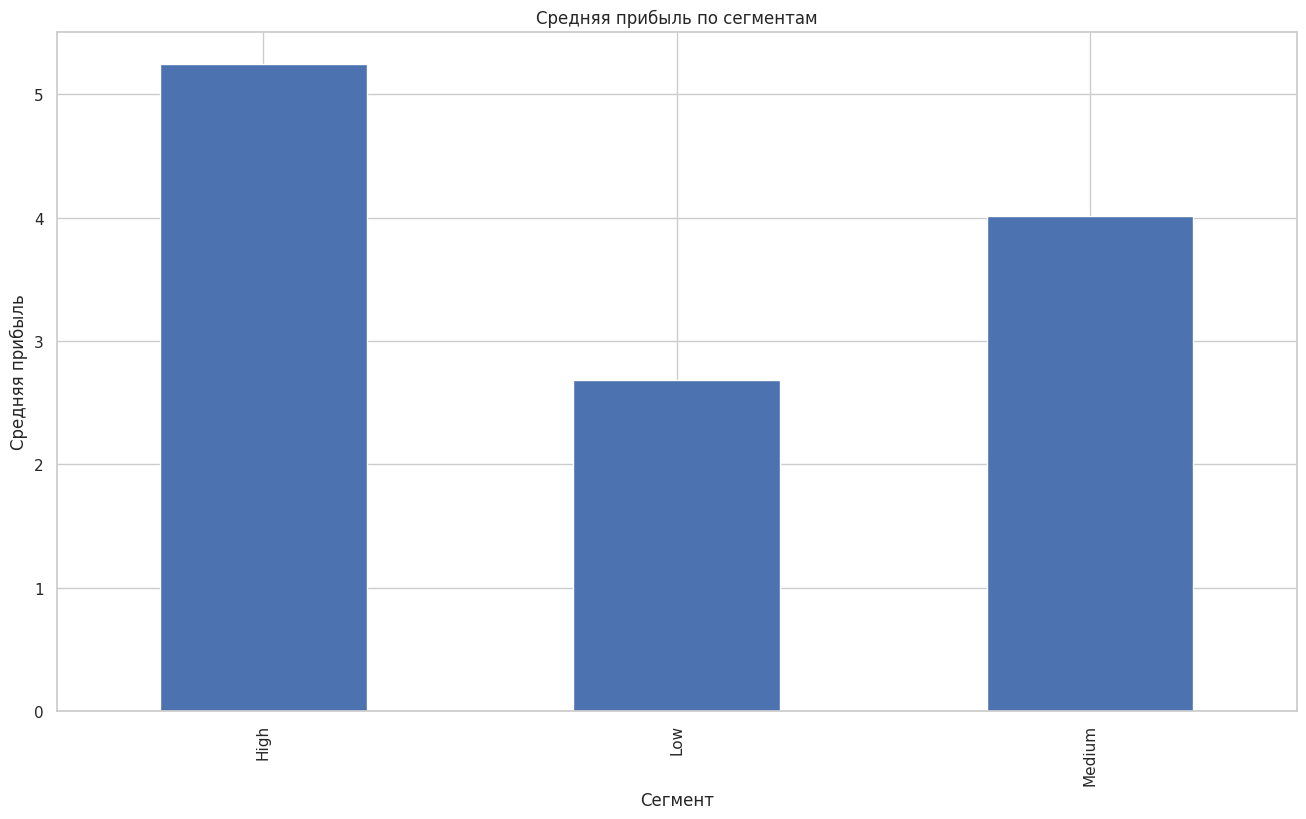

In [83]:
med = money['прибыль'].median()
sko = np.std(money['прибыль'])
print("Медианное значение: ", med)
print("Стандартное отклонение: ", sko)
print(money['прибыль'].describe())

def segment_customer(row):
    if row['прибыль'] < 3.3:  
        return 'Low'
    elif row['прибыль'] < 4.67:  
        return 'Medium'
    else:  
        return 'High'

money['segment'] = money.apply(segment_customer, axis=1)

print(money['segment'].value_counts())

money.groupby('segment')['прибыль'].mean().plot(kind='bar')
plt.title('Средняя прибыль по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Средняя прибыль')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Медианное значение и стандартное отклонение рассчитаны правильно.

Сегментация выполнена корректно:

Категории (Low, Medium, High) распределены по количеству клиентов.
Видно, что большинство клиентов находится в сегменте Medium.

График наглядно показывает среднюю прибыль по сегментам:
Клиенты из High сегмента приносят наибольшую прибыль.
Low сегмент имеет минимальную прибыль.


In [84]:
def custom_predict(X, threshold):
    probs = pipe_final.predict_proba(X)
    return (probs[:, 1] > threshold).astype(int)

predictions_precision = custom_predict(X, threshold=0.5)

X['predictions'] = predictions_precision
X['probs'] = pipe_final.predict_proba(X)[:, 1]

display(X[['predictions', 'probs']].head())

,predictions,probs
id,,
215349,1,0.984227
215350,1,0.760422
215351,1,0.736103
215352,1,0.974227
215353,1,0.802449


In [85]:
money['категории_прибыли'] = money['прибыль'].apply(lambda x: 'мало' if x < (med - sko) 
                                                       else ('много' if x > (med + sko) 
                                                       else 'нормально'))

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

"мало": Клиенты с прибылью ниже (медиана - стандартное отклонение).
"нормально": Клиенты с прибылью в пределах одного стандартного отклонения от медианы.
"много": Клиенты с прибылью выше (медиана + стандартное отклонение).


In [86]:
X = X.reset_index()

In [87]:
X = pd.merge(X, money, on='id', sort=True)
X.head()

,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца,минут_предыдущего_месяца,минут_текущего_месяца,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,...,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,predictions,probs,прибыль,segment,категории_прибыли
0,215349,4472.0,4971.6,5216.0,12,10,премиум,да,4.4,4,...,Товары для детей,4,4,2,5,1,0.984227,4.16,Medium,нормально
1,215350,4826.0,5058.4,5457.5,8,13,стандарт,нет,4.9,3,...,Домашний текстиль,5,2,1,5,1,0.760422,3.13,Low,нормально
2,215351,4793.0,6610.4,6158.0,11,13,стандарт,да,3.2,5,...,Товары для детей,5,0,6,4,1,0.736103,4.87,High,нормально
3,215352,4594.0,5872.5,5807.5,8,11,стандарт,нет,5.1,3,...,Товары для детей,3,2,3,2,1,0.974227,4.21,Medium,нормально
4,215353,5124.0,5388.5,4738.5,10,10,стандарт,да,3.3,4,...,Домашний текстиль,4,1,1,4,1,0.802449,3.95,Medium,нормально


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Результирующая таблица содержит 21 колонку, включая признаки из обеих таблиц.


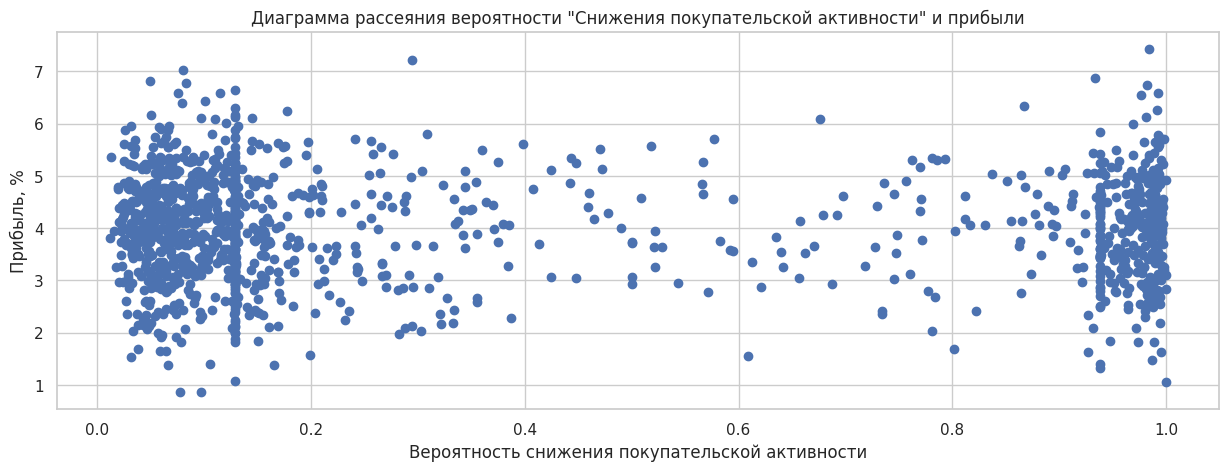

In [88]:
plt.figure(figsize=[15, 5])
plt.scatter(X.probs, X.прибыль);
plt.title('Диаграмма рассеяния вероятности "Снижения покупательской активности" и прибыли')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыль, %')
plt.show()

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">

Построен график, демонстрирующий взаимосвязь между вероятностью снижения покупательской активности (X.probs) и прибылью (X.прибыль).

In [89]:
X['категория_снижения'] = X['probs'].apply(lambda x: 'Снизилась' if x > 0.79 else 'Прежний уровень') 

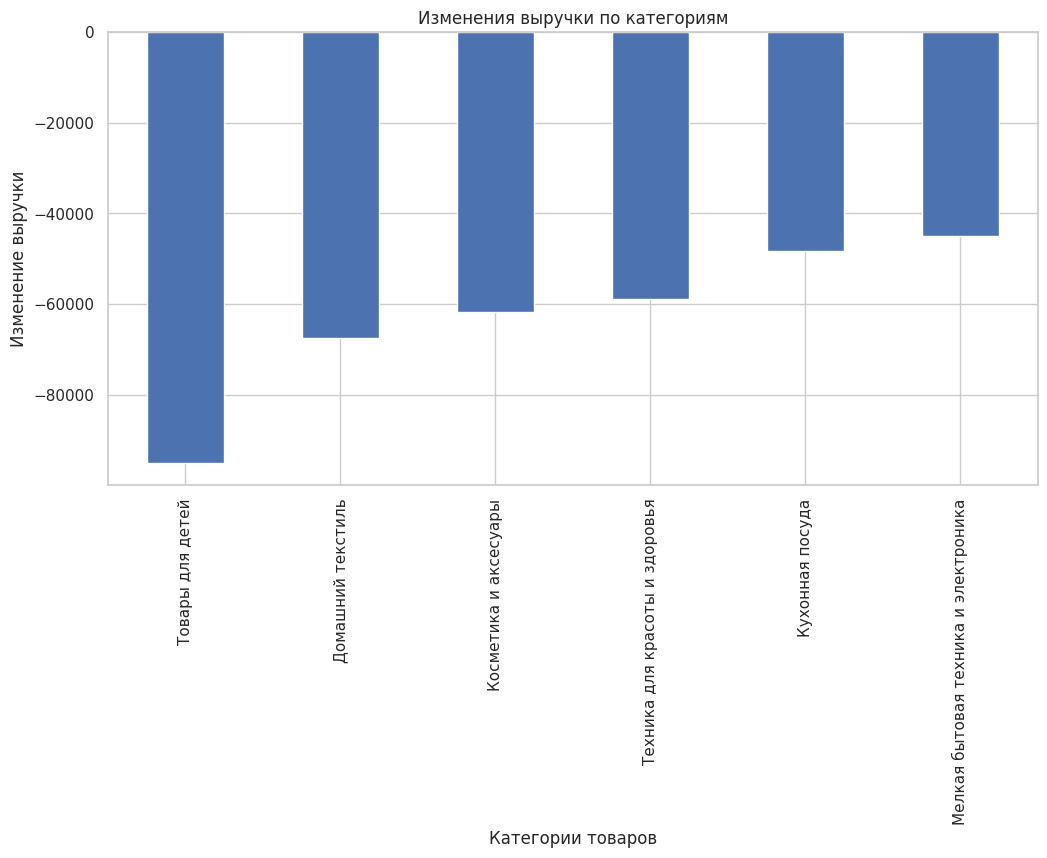

In [90]:
pivot_table = df.pivot_table(index='популярная_категория', 
                             values=['выручка_предыдущего_месяца', 'выручка_текущего_месяца'], 
                             aggfunc='sum')

pivot_table['изменение'] = pivot_table['выручка_текущего_месяца'] - pivot_table['выручка_предыдущего_месяца']

pivot_table['изменение'].sort_values().plot(kind='bar', figsize=(12, 6), title='Изменения выручки по категориям')
plt.xlabel('Категории товаров')
plt.ylabel('Изменение выручки')
plt.show()

In [91]:
df = pd.merge(df, money[['id', 'прибыль']], on='id', how='left')
print(df.columns)

Index(['id', 'выручка_препредыдущего_месяца', 'выручка_предыдущего_месяца',
       'выручка_текущего_месяца', 'минут_предыдущего_месяца',
       'минут_текущего_месяца', 'покупательская_активность', 'тип_сервиса',
       'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес',
       'длительность', 'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'прибыль'],
      dtype='object')


In [92]:
df['сегмент'] = 'High'  
df.loc[df['прибыль'] < 4.67, 'сегмент'] = 'Medium'  
df.loc[df['прибыль'] < 3.3, 'сегмент'] = 'Low'  

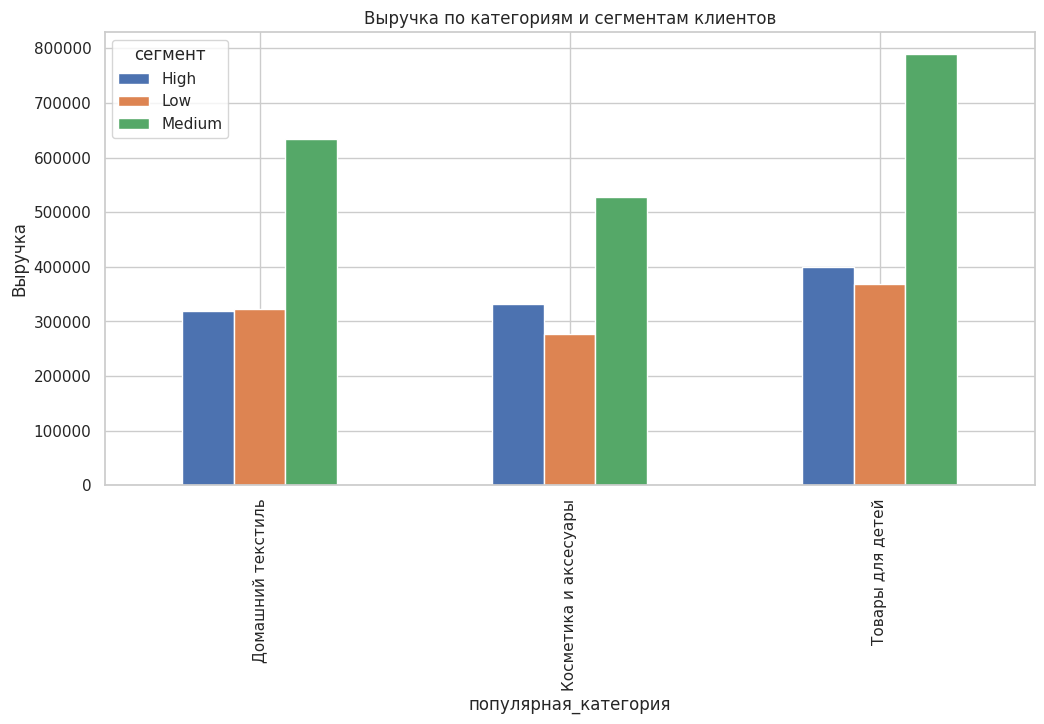

In [93]:
if 'сегмент' not in df.columns:
    print("Столбец 'сегмент' отсутствует. Проверьте предыдущие шаги.")
else:
    top_drop_categories = pivot_table['изменение'].nsmallest(3).index

    filtered_data = df[df['популярная_категория'].isin(top_drop_categories)]

    segment_pivot = filtered_data.pivot_table(index='популярная_категория', 
                                              columns='сегмент',
                                              values='выручка_текущего_месяца', 
                                              aggfunc='sum')

    segment_pivot.plot(kind='bar', figsize=(12, 6), title='Выручка по категориям и сегментам клиентов')
    plt.ylabel('Выручка')
    plt.show()


<div class="alert alert-info">
Выводы:

1. **Падение выручки:**
   - Наибольшее снижение выручки наблюдается в категориях **"Товары для детей"**, **"Домашний текстиль"**, и **"Косметика и аксессуары"**.
   - Это требует внимания, так как данные категории составляют значительную часть продаж.

2. **Сегменты клиентов:**
   - Основной вклад в выручку по этим категориям вносят клиенты сегментов **Medium** и **Low**.
   - Клиенты сегмента **High** стабильно приносят меньшую выручку, но также могут быть важны для удержания, чтобы не терять прибыльных покупателей.

3. **Рекомендации по акциям:**
   - Для категории **"Товары для детей"** целесообразно проводить акции, ориентированные на сегменты **Medium** и **Low**, чтобы стимулировать покупательскую активность.
   - В категории **"Домашний текстиль"** можно предложить дополнительные скидки и лояльные программы для клиентов сегмента **Low**, так как они приносят значительную часть выручки.
   - Для категории **"Косметика и аксессуары"** можно рассмотреть целевые рекламные кампании для привлечения клиентов сегмента **Medium**, которые демонстрируют высокий потенциал.

4. **Обоснованность действий:**
   - Проведение акций именно в указанных категориях и нацеливание на соответствующие сегменты клиентов позволит эффективно перераспределить маркетинговые бюджеты и удержать покупателей.
   - Предложенные меры могут улучшить общую выручку и компенсировать падение продаж в проблемных категориях.

5. **Рекомендации для дальнейших шагов:**
   - Провести более глубокий анализ причин падения выручки: возможно, это связано с изменением спроса, ценовой конкуренцией или внутренними факторами (например, ассортиментом).
   - Тестировать акции на ограниченной группе клиентов из сегментов Medium и Low, чтобы оценить их эффективность перед масштабированием на всю клиентскую базу.


<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
Сегмент клиентов с низкой прибыльностью ("мало") и небольшой долей акционных покупок (< 3):

                                                                                           
Снижение покупательской активности:
Клиенты с низкой прибыльностью и небольшой долей акционных покупок демонстрируют снижение покупательской активности.
                                                                                           
                                                                                           
Анализ показал, что у таких клиентов меньшее количество просмотренных страниц за визит, меньше времени, проведенного на сайте, и больше неоплаченных товаров в корзине по сравнению с активными покупателями.
                                                                                           
                                                                                           
Рекомендации:
Работа с категорией "Снизилась":
Разработать акционные предложения, чтобы стимулировать увеличение числа акционных покупок.
Упростить процесс оплаты для снижения количества неоплаченных товаров в корзине.
Привлечь внимание клиентов к более интересным и популярным категориям товаров через персонализированные рекомендации.
Сегмент клиентов с высокой вероятностью снижения активности:

                                                                                           
Выявленная взаимосвязь:
На основе графика взаимосвязи вероятности снижения активности и прибыли видно, что снижение покупательской активности коррелирует с низкой прибылью. У таких клиентов требуется поддержание интереса к платформе.

                                                                                           
Рекомендации:
Персонализация взаимодействия:
                                                                                           
Присылать клиентам индивидуальные рекомендации на основе их истории покупок.
Использовать push-уведомления о неоплаченных товарах.
                                                                                           
Увеличение вовлеченности:
                                                                                           
Проводить дополнительные акции и стимулировать участие клиентов в промо-кампаниях.
                                                                                           
Увеличивать время нахождения клиентов на сайте через контент и уникальные предложения.

                                                                                           
Общий вывод:
На основе сегментации покупателей были выявлены группы с низкой активностью и высокой вероятностью снижения интереса к платформе. Эти группы требуют индивидуального подхода, направленного на повышение их вовлеченности и удержание на платформе.
Предложенные рекомендации и стратегии помогут удерживать клиентов, улучшать их пользовательский опыт и увеличивать прибыль компании.

## Общий вывод

<div style="background-color: lavender; padding: 10px; border-radius: 5px;">
**Описание задачи:**

Цель исследования — построить модель, которая сможет прогнозировать вероятность снижения покупательской активности клиентов в течение следующих трёх месяцев. Также в рамках проекта использовались дополнительные данные о прибыльности клиентов, предоставленные финансовым департаментом, чтобы определить, какой доход каждый покупатель приносил компании за последние три месяца. На основе модели и данных о прибыльности были выделены сегменты покупателей с целью разработки персонализированных предложений для каждой группы.

**Исходные данные и предобработка:**

- **market_file.csv**: содержит информацию о поведении покупателей на сайте, коммуникациях с клиентами и продуктовом поведении.
- **market_money.csv**: включает данные о выручке, полученной от клиентов, то есть сколько они потратили за период взаимодействия с сайтом.
- **market_time.csv**: содержит данные о времени (в минутах), проведённом клиентами на сайте.
- **money.csv**: включает данные о среднемесячной прибыли, которую клиент приносит компании за последние три месяца.

**Предобработка данных:**

- Изменены названия столбцов для унификации и удобства работы.
- Исправлены опечатки в данных, например:
  - "стандартт" заменено на "стандарт".
  - "предыдцщий_месяц" заменено на "предыдущий_месяц".
- Приведены к числовому типу данные в столбцах: "маркет_актив_6_мес", "выручка", "акционные_покупки".

**Поиск лучшей модели:**

Наилучшей моделью для решения задачи стала SVC (Support Vector Classifier) с настройкой probability=True. Она показала высокий уровень качества на кросс-валидации со средним ROC-AUC 0.9066, что свидетельствует о способности модели эффективно классифицировать данные.

**Сегментация и выводы:**
На основе данных о покупательской активности и прибыльности клиентов выделены ключевые сегменты:

Клиенты с низкой прибыльностью ("мало") и долей акционных покупок < 3:

- У этих клиентов наблюдается снижение покупательской активности. Они реже просматривают страницы, проводят меньше времени на сайте и чаще оставляют неоплаченные товары в корзине.
Рекомендации:
- Разработать акционные предложения для увеличения числа покупок.
- Упростить процесс оплаты, чтобы сократить количество неоплаченных товаров в корзине.
- Персонализировать рекомендации, привлекая внимание к популярным товарам.

Клиенты с вероятностью снижения активности:

Клиенты с высокой вероятностью снижения активности (по результатам модели) демонстрируют меньшую вовлечённость.
Рекомендации:
- Персонализировать взаимодействие через push-уведомления и рассылки.
- Увеличивать время пребывания клиентов на сайте за счёт интересных предложений и контента.
- Проводить дополнительные акции, стимулируя интерес к платформе.

                                                                      
**Общие рекомендации:**

Персонализация:

Использовать данные истории покупок для отправки релевантных предложений и акций.
Упрощение интерфейса:
Упростить процесс оформления заказов, делая его удобным и быстрым.
Поддержка клиентов:
Обеспечить высокое качество обслуживания, чтобы укрепить доверие и лояльность.
Регулярный анализ данных:
Проводить опросы удовлетворённости и анализ ключевых метрик для адаптации стратегий.

Данные рекомендации помогут удерживать клиентов, увеличивать вовлечённость и повышать конверсию на всех этапах взаимодействия с покупателями.